# MultiOmics RNA + ATAC for Chao dataset emphasis on OL population (MORNAATACCOL) technical documentation
## Multiomics RNAseq & ATACseq on EAE model

<hr>

**This notebook is the following of MORNAATACCOL 4 notebook**

<hr>

Related paper : [Mimitou et al. (2020)](https://www.biorxiv.org/content/10.1101/2020.09.08.286914v1)

Data used in this notebook :

In [ ]:
#/Castelo_Branco/NGSDATA/EAE_multiomics_EAMM_250521/Processed_data/ARC2
#/Castelo_Branco/NGSDATA/EAE_late_multiomics_CZ_030721/Processed_data
#only the filtered_feature_bc_matrix repositories, atac_fragments.tsv.gz and atac_fragments.tsv.gz.tbi

#/Castelo_Branco/NGSDATA/Datasets_from_literature

#Memory needed for a full run : 120Gb

In [ ]:
#Early1          = P21208_1003_EAE_ARC
#PeakCtrl2       = P21208_1004_EAE_ARC
#Peak2           = P21208_1005_EAE_ARC
#Late1           = MORNAATACC_1003
#EarlyCtrl2      = P23605_1002
#Peak3           = P23605_1003
#PeakCtrl3       = P23605_1004
#EarlyCtrl3      = P24115_1001
#EarlyFemale3    = P24115_1002
#EarlyMale3      = P24115_1003
#Late2           = P25316_1001
#LateCtrl2       = P25316_1002
#Late3           = P25316_1003
#LateCtrl3       = P25316_1004
#PeakMale4        = P27208_1001
#PeakFemale4      = P27208_1002
#LateMale4        = P27208_1003
#LateFemale4      = P27208_1004

## 0. Environment status

In [5]:
%use

Subkernel,Kernel Name,Language,Language Module,Interpreter
Bash,bash,bash,sos_bash,/usr/bin/python3
Bash,calysto_bash,bash,sos_bash,python
Python3,python3,python,sos_python,python
R,ir,R,sos_r,/usr/lib/R/bin/R
SoS,sos,sos,,/usr/bin/python3


In [3]:
lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04 LTS
Release:	20.04
Codename:	focal


In [4]:
lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
Address sizes:       46 bits physical, 48 bits virtual
CPU(s):              20
On-line CPU(s) list: 0-19
Thread(s) per core:  1
Core(s) per socket:  10
Socket(s):           2
NUMA node(s):        2
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz
Stepping:            1
CPU MHz:             2735.498
CPU max MHz:         3100.0000
CPU min MHz:         1200.0000
BogoMIPS:            4390.12
Virtualization:      VT-x
L1d cache:           640 KiB
L1i cache:           640 KiB
L2 cache:            5 MiB
L3 cache:            50 MiB
NUMA node0 CPU(s):   0-9
NUMA node1 CPU(s):   10-19
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cm
                     ov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pb
                     e syscall nx pdpe1gb rdtscp lm constant_t

In [5]:
grep MemTotal /proc/meminfo | awk '{print $2 / 1024}'

128374


In [ ]:
apt list --installed

In [ ]:
pip list

In [9]:
jupyter --version

Selected Jupyter core packages...
IPython          : 7.30.1
ipykernel        : 6.6.0
ipywidgets       : 7.6.5
jupyter_client   : 7.1.0
jupyter_core     : 4.9.1
jupyter_server   : 1.13.1
jupyterlab       : 3.1.17
nbclient         : 0.5.9
nbconvert        : 6.2.0
nbformat         : 5.1.3
notebook         : 6.4.6
qtconsole        : 5.2.2
traitlets        : 5.1.0


In [1]:
#conda env export -n jupyter

## 1. Loading environments

### 1.1 R Packages

In [1]:
library(Seurat)
library(Signac)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(stringr)
library(harmony)
library(clustree)
library(data.table)
library(biomaRt)
library(cowplot)
library(randomForest)
library(ggplot2)
library(caret)
library(tidyverse)
library(pheatmap)
library(grid)
library(gridExtra)
library(biovizBase)
library(ggrepel)
library(viridis)
library(reshape2)
library(hues)
library(clusterProfiler)
library(org.Mm.eg.db)
library(ggnewscale)
library(scales)

#conda dependencies trouble
library(enrichplot)
library(ReactomePA)

#Doublet determination
#Cannot be installed through conda
library(DoubletFinder)

library(textclean)
library(mclust)

#ArchR
library(ArchR)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)

library(muscat)
library(SingleCellExperiment)
library(scater)
library(cowplot)
library(UpSetR)
library(limma)
library(Matrix.utils)
library(purrr)
library(DESeq2)
library(EnhancedVolcano)

Attaching SeuratObject

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    I, expand.grid, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading requir

In [2]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] EnhancedVolcano_1.16.0                   
 [2] DESeq2_1.38.3                            
 [3] Matrix.utils_0.9.8                       
 [4] limma_3.54.2                             
 [5] UpSetR_1.4.0                             
 [6] scater_1.26.1                            
 [7] scuttle_1.8.4                            
 [8] Sing

### 1.2 Functions

In [3]:
PrctCellExpringGene <- function(object, genes, group.by = "all"){
    if(group.by == "all"){
        prct = unlist(lapply(genes,calc_helper, object=object))
        result = data.frame(Markers = genes, Cell_proportion = prct)
        return(result)
    }

    else{        
        list = SplitObject(object, group.by)
        factors = names(list)

        results = lapply(list, PrctCellExpringGene, genes=genes)
        for(i in 1:length(factors)){
        results[[i]]$Feature = factors[i]
        }
        combined = do.call("rbind", results)
        return(combined)
    }
}

calc_helper <- function(object,genes){
    counts = object[['RNA']]@counts
    ncells = ncol(counts)
    if(genes %in% row.names(counts)){
    sum(counts[genes,]>0)/ncells
    }else{return(NA)}
}

NbCellExpringGene <- function(object, genes, group.by = "all"){
    if(group.by == "all"){
        nb = unlist(lapply(genes,calc_helper_nb, object=object))
        result = data.frame(Markers = genes, Cell_nb = nb)
        return(result)
    }

    else{        
        list = SplitObject(object, group.by)
        factors = names(list)

        results = lapply(list, NbCellExpringGene, genes=genes)
        for(i in 1:length(factors)){
        results[[i]]$Feature = factors[i]
        }
        combined = do.call("rbind", results)
        return(combined)
    }
}

calc_helper_nb <- function(object,genes){
    counts = object[['RNA']]@counts
    if(genes %in% row.names(counts)){
    length(counts[genes,][counts[genes,] > 0])
    }else{return(NA)}
}

DoMultiBarHeatmap <- function (object, features = NULL, cells = NULL, group.by = "ident", additional.group.by = NULL, additional.group.sort.by = NULL,  cols.use = NULL, group.bar = TRUE, disp.min = -2.5, disp.max = NULL, slot = "scale.data", assay = NULL, label = TRUE, size = 5.5, hjust = 0, angle = 45, raster = TRUE, draw.lines = TRUE, lines.width = NULL, group.bar.height = 0.02, combine = TRUE){

  cells <- cells %||% colnames(x = object)
  if (is.numeric(x = cells)) {
    cells <- colnames(x = object)[cells]
  }
  assay <- assay %||% DefaultAssay(object = object)
  DefaultAssay(object = object) <- assay
  features <- features %||% VariableFeatures(object = object)
  ## Why reverse???
  features <- rev(x = unique(x = features))
  disp.max <- disp.max %||% ifelse(test = slot == "scale.data", yes = 2.5, no = 6)
  possible.features <- rownames(x = GetAssayData(object = object, slot = slot))
  if (any(!features %in% possible.features)) {
    bad.features <- features[!features %in% possible.features]
    features <- features[features %in% possible.features]
    if (length(x = features) == 0) {
      stop("No requested features found in the ", slot,
      " slot for the ", assay, " assay.")
    }
    warning("The following features were omitted as they were not found in the ", slot, " slot for the ", assay, " assay: ", paste(bad.features, collapse = ", "))
  }

  if (!is.null(additional.group.sort.by)) {
    if (any(!additional.group.sort.by %in% additional.group.by)) {
      bad.sorts <- additional.group.sort.by[!additional.group.sort.by %in% additional.group.by]
      additional.group.sort.by <- additional.group.sort.by[additional.group.sort.by %in% additional.group.by]
      if (length(x = bad.sorts) > 0) {
        warning("The following additional sorts were omitted as they were not a subset of additional.group.by : ",
        paste(bad.sorts, collapse = ", "))
      }
    }
  }

  data <- as.data.frame(x = as.matrix(x = t(x = GetAssayData(object = object, slot = slot)[features, cells, drop = FALSE])))

  object <- suppressMessages(expr = StashIdent(object = object, save.name = "ident"))
  group.by <- group.by %||% "ident"
  groups.use <- object[[c(group.by, additional.group.by[!additional.group.by %in% group.by])]][cells, , drop = FALSE]
  plots <- list()
  for (i in group.by) {
    data.group <- data
    if (!is.null(additional.group.by)) {
      additional.group.use <- additional.group.by[additional.group.by!=i]
      if (!is.null(additional.group.sort.by)){
        additional.sort.use = additional.group.sort.by[additional.group.sort.by != i]
      } else {
        additional.sort.use = NULL
      }
    } else {
      additional.group.use = NULL
      additional.sort.use = NULL
    }

    group.use <- groups.use[, c(i, additional.group.use), drop = FALSE]

    for(colname in colnames(group.use)){
      if (!is.factor(x = group.use[[colname]])) {
        group.use[[colname]] <- factor(x = group.use[[colname]])
      }
    }

    if (draw.lines) {
      lines.width <- lines.width %||% ceiling(x = nrow(x = data.group) * 0.0025)
      placeholder.cells <- sapply(X = 1:(length(x = levels(x = group.use[[i]])) * lines.width), FUN = function(x) {
        return(Seurat:::RandomName(length = 20))
      })
      placeholder.groups <- data.frame(rep(x = levels(x = group.use[[i]]), times = lines.width))
      group.levels <- list()
      group.levels[[i]] = levels(x = group.use[[i]])
      for (j in additional.group.use) {
        group.levels[[j]] <- levels(x = group.use[[j]])
        placeholder.groups[[j]] = NA
      }

      colnames(placeholder.groups) <- colnames(group.use)
      rownames(placeholder.groups) <- placeholder.cells

      group.use <- sapply(group.use, as.vector)
      rownames(x = group.use) <- cells

      group.use <- rbind(group.use, placeholder.groups)

      for (j in names(group.levels)) {
        group.use[[j]] <- factor(x = group.use[[j]], levels = group.levels[[j]])
      }

      na.data.group <- matrix(data = NA, nrow = length(x = placeholder.cells), ncol = ncol(x = data.group), dimnames = list(placeholder.cells, colnames(x = data.group)))
      data.group <- rbind(data.group, na.data.group)
    }

    order_expr <- paste0('order(', paste(c(i, additional.sort.use), collapse=','), ')')
    group.use = with(group.use, group.use[eval(parse(text=order_expr)), , drop=F])

    plot <- Seurat:::SingleRasterMap(data = data.group, raster = raster, disp.min = disp.min, disp.max = disp.max, feature.order = features, cell.order = rownames(x = group.use), group.by = group.use[[i]])

    if (group.bar) {
      pbuild <- ggplot_build(plot = plot)
      group.use2 <- group.use
      cols <- list()
      na.group <- Seurat:::RandomName(length = 20)
      for (colname in rev(x = colnames(group.use2))) {
        if (colname == i) {
          colid = paste0('Identity (', colname, ')')
        } else {
          colid = colname
        }

        # Default
        cols[[colname]] <- c(scales::hue_pal()(length(x = levels(x = group.use[[colname]]))))

        #Overwrite if better value is provided
        if (!is.null(cols.use[[colname]])) {
          req_length = length(x = levels(group.use))
          if (length(cols.use[[colname]]) < req_length){
            warning("Cannot use provided colors for ", colname, " since there aren't enough colors.")
          } else {
            if (!is.null(names(cols.use[[colname]]))) {
              if (all(levels(group.use[[colname]]) %in% names(cols.use[[colname]]))) {
                cols[[colname]] <- as.vector(cols.use[[colname]][levels(group.use[[colname]])])
              } else {
                warning("Cannot use provided colors for ", colname, " since all levels (", paste(levels(group.use[[colname]]), collapse=","), ") are not represented.")
              }
            } else {
              cols[[colname]] <- as.vector(cols.use[[colname]])[c(1:length(x = levels(x = group.use[[colname]])))]
            }
          }
        }

        # Add white if there's lines
        if (draw.lines) {
          levels(x = group.use2[[colname]]) <- c(levels(x = group.use2[[colname]]), na.group)
          group.use2[placeholder.cells, colname] <- na.group
          cols[[colname]] <- c(cols[[colname]], "#FFFFFF")
        }
        names(x = cols[[colname]]) <- levels(x = group.use2[[colname]])

        y.range <- diff(x = pbuild$layout$panel_params[[1]]$y.range)
        y.pos <- max(pbuild$layout$panel_params[[1]]$y.range) + y.range * 0.015
        y.max <- y.pos + group.bar.height * y.range
        pbuild$layout$panel_params[[1]]$y.range <- c(pbuild$layout$panel_params[[1]]$y.range[1], y.max)

        plot <- suppressMessages(plot +
          annotation_raster(raster = t(x = cols[[colname]][group.use2[[colname]]]),  xmin = -Inf, xmax = Inf, ymin = y.pos, ymax = y.max) +
          annotation_custom(grob = grid::textGrob(label = colid, hjust = 0, gp = gpar(cex = 0.75)), ymin = mean(c(y.pos, y.max)), ymax = mean(c(y.pos, y.max)), xmin = Inf, xmax = Inf) +
          coord_cartesian(ylim = c(0, y.max), clip = "off")
        )


        if ((colname == i) && label) {
          x.max <- max(pbuild$layout$panel_params[[1]]$x.range)
          x.divs <- pbuild$layout$panel_params[[1]]$x.major %||% pbuild$layout$panel_params[[1]]$x$break_positions()
          group.use$x <- x.divs

          label.x.pos <- tapply(X = group.use$x, INDEX = group.use[[colname]], FUN = median) * x.max
          label.x.pos <- data.frame(group = names(x = label.x.pos), label.x.pos)
          plot <- plot + geom_text(stat = "identity", data = label.x.pos, aes_string(label = "group", x = "label.x.pos"), y = y.max + y.max *  0.03 * 0.5, angle = angle, hjust = hjust, size = size)
          plot <- suppressMessages(plot + coord_cartesian(ylim = c(0, y.max + y.max * 0.002 * max(nchar(x = levels(x = group.use[[colname]]))) * size), clip = "off"))
        }
      }
    }
    plot <- plot + theme(line = element_blank())
    plots[[i]] <- plot
  }
  if (combine) {
    plots <- CombinePlots(plots = plots)
  }
  return(plots)
}


#####################################################
# Function for getting the marker peaks from the Seurat
# object, based on the current ident
#####################################################
getMarkerPeaks <- function(obj, doublets, n_peaks = 100, min_cells = 200){

  n_clusters = length(unique(as.vector(Idents(obj))))
  
  cells <- Cells(obj)
  
  # remove the doublet cells for better marker peaks
  obj <- subset(obj, cells = cells[!cells %in% doublets])
  
  obj@assays$ATAC@data@x <- obj@assays$ATAC@counts@x
  
  # default preporcessing o Signac applied
  obj <- RunTFIDF(obj, verbose = F)
  obj <- FindTopFeatures(obj, min.cutoff = NULL, verbose = F)
  obj <- RunSVD(
    object = obj,
    reduction.key = 'SVD_',
    reduction.name = 'svd',
    seed.use = 1,
    verbose = F
  )
  
  # get the marker peaks between all clusters
  da_peaks <- FindAllMarkers(
    object = obj,
    slot = "data",
    min.pct = 0.1,
    only.pos = TRUE,
    test.use = 'LR',
    min.cells.group = min_cells,
    verbose = F
  )
  
  # only keep the significant peaks
  metadata = lapply(unique(da_peaks$cluster), function(x){
    return(data.frame(da_peaks[da_peaks$p_val_adj < 0.05 & da_peaks$cluster == x,]))
  })
  
  names(metadata) <- paste0("Cluster_", unique(da_peaks$cluster))
  
  rm(da_peaks)
  
  meta_peaks = data.frame()
  
  for (i in names(metadata)) {
    
    cur_meta = data.frame(metadata[[i]])
    cur_meta$peaks = row.names(metadata[[i]])
    cur_meta$cluster = i
    row.names(cur_meta) = c()
    
    meta_peaks = rbind(meta_peaks, cur_meta)
    
    rm(cur_meta)
    
  }
  
  # sort the peaks based on the fold changes and signifigance, choose ones with high FC first
  meta_peaks = meta_peaks[order(meta_peaks$avg_logFC, -meta_peaks$p_val_adj, decreasing = T),]
  
  marker_peaks_set = data.frame(matrix(ncol=2,nrow=0, dimnames=list(NULL, c("gene", "cluster"))))
  
  # extract 100 marker peaks for each cluster
  while(nrow(marker_peaks_set) < n_peaks*n_clusters) {
    
    temp = meta_peaks[1, c("gene", "cluster")]
    
    marker_peaks_set = rbind(marker_peaks_set, temp)
    
    meta_peaks = meta_peaks[which(meta_peaks$gene != temp$gene),]
    
    if(length(which(marker_peaks_set$cluster == temp$cluster)) == n_peaks){
      meta_peaks = meta_peaks[which(meta_peaks$cluster != temp$cluster),]
    }
    
    rm(temp)
  }
  
  marker_peaks_set = marker_peaks_set[!is.na(marker_peaks_set$gene),]
  
  marker_peaks_set$cluster= factor(marker_peaks_set$cluster, levels = str_sort(unique(marker_peaks_set$cluster), numeric = T))
  marker_peaks_set = marker_peaks_set[order(marker_peaks_set$cluster),]
  
  rm(meta_peaks)
  
  colnames(marker_peaks_set)[1]<- "peaks"
  
  return(marker_peaks_set)
}

############################################
# get the readcount distribution profile for
# the singlet cells of every cluster
############################################
annotateDoublets <- function(obj, marker_peaks, doublets, k = 15){

  # get the read count distributions on the cluster specific marker peaks for all of the cells
  cell.values <- getCellValues(obj, cells = Cells(obj), marker_peaks_set = marker_peaks, doublets = doublets, k = k)
  
  #get the profile for the singlet cells of each cluster
  singlet.profile <- getProfiles(cell.values)
 
  # just annotate the doublets
  doublets <- cell.values %>% 
    subset(doublet == "doublet")
  
  clusters <- doublets %>% dplyr::select(starts_with("Cluster_")) %>% colnames()
  
  # look at every cluster in the data
  a.class <- lapply(clusters, function(clus){
    
    # just select the doublets that have the current cluster
    # as its most dominant cluster
    t.doublets <- doublets %>%
      subset(a.homotypic == clus, select = clusters)
    
    # get the profile of the current cluster
    t.profile <- singlet.profile[,clus]
    
    # calculate the distance of doublet cell distributions to
    # the profile of the current cluster
    t.dist <- apply(t.doublets, 1, function(cell){
      return(dist(rbind(cell, t.profile)))
    })
    
    # fit a GMM using the mclust package with no class limitations
    fit <- Mclust(t.dist, verbose = F)
    t.class <- fit$classification
    
    t.doublets$dist <- t.dist[rownames(t.doublets)]
    t.doublets$class <- t.class[rownames(t.doublets)]
    t.doublets$max.class <- names(which.max(fit[["parameters"]][["mean"]]))
    t.doublets$num.class <- length(unique(fit$classification))
    return(t.doublets[,c("dist", "class", "max.class", "num.class")])
  }) %>% bind_rows()
  
  doublets$class <- a.class[rownames(doublets),"class"]
  doublets$max.class <- a.class[rownames(doublets),"max.class"]
  doublets$num.class <- a.class[rownames(doublets),"num.class"]
  
  doublets <- lapply(rownames(doublets), function(cell){
    probs <- doublets[cell, clusters]
    
    # only classify the doublets that belong to the final class 
    # doublets[cell,"type"] <- ifelse(doublets[cell,"class"]== doublets[cell,"max.class"], "heterotypic", "homotypic")
    doublets[cell,"d.type"] <- ifelse(doublets[cell,"class"]== doublets[cell,"max.class"] & doublets[cell,"num.class"] > 1,
                                    "heterotypic", "homotypic")
    
    # report the top clusters based on type of the doublet; if homotypic just one, if heterotypic top 2 clusters
    doublets[cell, "d.annotation"] <- ifelse(doublets[cell,"d.type"] == "homotypic",
                                             names(probs)[order(probs, decreasing = T)[1]],
                                             paste(sort(names(probs)[order(probs, decreasing = T)[1:2]]), collapse = ".")) 
    
    return(doublets[cell,!(colnames(doublets) %in% c("a.heterotypic", "a.homotypic", "ident", "class", "max.class","num.class")), drop = FALSE])
  }) %>% bind_rows()

  return(doublets)
}

#####################################################
# Function to get the ditsribution of read counts on
# the marker peaks of clusters
#####################################################
getReadCountDistributions <- function(marker_peaks, read_counts){
  
  t_read_counts = data.frame(merge(marker_peaks, 100*read_counts, by.x = "peaks", by.y = 0, sort = F))
  names(t_read_counts) <- sub("^X", "", names(t_read_counts))
  t_read_counts$ids = unclass(t_read_counts$cluster)
  
  probs = matrix(nrow = ncol(read_counts), ncol = length(unique(t_read_counts$cluster)))
  
  row.names(probs) <- colnames(read_counts)
  colnames(probs) <- unique(t_read_counts$cluster)
  
  for (i in 1:nrow(probs)) {
    density_data = vector()
    
    for(j in 1:nrow(t_read_counts))
      density_data = c(density_data, rep(t_read_counts$ids[j], t_read_counts[j,row.names(probs)[i]]))
    
    for(j in 1:ncol(probs)){
      if(j==1)
        probs[i,j] = ecdf(density_data)(j)
      else
        probs[i,j] = (ecdf(density_data)(j) - ecdf(density_data)((j-1)))
    }
    
  }
  
  return(data.frame(probs))
}

#####################################################
# Function to plot the read count distributions of
# the given cells
#####################################################
plotReadCountDistributions <- function(probs, folder_path){
  
  if(!dir.exists(folder_path))
    dir.create(folder_path)
  
  sapply(rownames(probs), function(x){long_probs = gather(as.data.frame(bind_rows(probs[x,])), cell_type, probability, factor_key = TRUE)
  ggplot(data=long_probs, aes(x=cell_type, y=probability)) +
    geom_col() +
    theme(axis.text.x = element_text(angle = 90)) +
    ggtitle(x) + xlab("Cluster") + ylab("Score") + ylim(0,1) +
    ggsave(filename = paste0(folder_path, "/Probs_", x, ".pdf"))})
  
}

#####################################################
# Function to add read count distributions for the 
# cells in the provided in te Seurat object with the
# provided marker peaks
#####################################################
getCellValues <- function(obj, cells, marker_peaks_set, doublets, k = 15){
  
  obj@assays$ATAC@data@x <- obj@assays$ATAC@counts@x
  
  obj <- RunTFIDF(obj, verbose = F)
  obj <- FindTopFeatures(obj, min.cutoff = NULL, verbose = F)
  obj <- RunSVD(
    object = obj,
    reduction.key = 'SVD_',
    reduction.name = 'svd',
    seed.use = 1,
    verbose = F
  )
  
  # get the neighbor graph of the cells for aggregation
  obj <- FindNeighbors(obj, reduction = "svd", dims = 1:50, k.param = k+1, verbose = F)
  
  cell_annotations <- lapply(cells, function(cell){
    
    # extract the k neighbors of the current cell
    neighbors <- names(obj@graphs$ATAC_nn[cell, obj@graphs$ATAC_nn[cell,] > 0])
    
    # extract the reads for the cell and its k-nearest neighbors
    reads <- Matrix::as.matrix(subset(obj, cells = neighbors, features = marker_peaks_set$peaks)@assays[["ATAC"]]@counts)
    
    no_clusters <- length(unique(marker_peaks_set$cluster))
    
    results = data.frame(matrix(nrow = 0, ncol = no_clusters+1)) %>%
      `colnames<-`(value = c("cell_id", as.character(unique(marker_peaks_set$cluster))))
    
    results[cell,"cell_id"] = cell
    
    # aggregate the reads for the cell by taking the mean with k-nn
    reads <- data.frame(apply(reads, 1, mean)) %>%
      `colnames<-`(value = cell)
    
    if(colSums(reads) == 0){
      results[,-1] <- 0
      
      results[cell, "a.heterotypic"] <- NA
      results[cell, "a.homotypic"] <- NA
        
      return(results)
    }
    
    # calculate the read count distribution of the cell on the marker peaks
    doublet_probs <- reads %>%
      getReadCountDistributions(marker_peaks_set,.) %>% data.frame()
    
    results[cell, colnames(doublet_probs)] <- doublet_probs
    
    # report the 2 clusters that have the highest score
    results[cell, "a.heterotypic"] <- paste(names(doublet_probs)[order(doublet_probs, decreasing = T)[1:2]], collapse = ".")
    
    #report the cluster with highest score
    results[cell, "a.homotypic"] <- names(which.max(doublet_probs))
    
    return(results)
  }) %>% do.call(rbind, .)
  
  # append the type of the cells
  cell_annotations <- mutate(cell_annotations, doublet = ifelse(cell_id %in% doublets, "doublet", "singlet"))
  row.names(cell_annotations) <- cell_annotations$cell_id
  
  cell_annotations[, "ident"] <- Idents(obj)[rownames(cell_annotations)]
  
  return(cell_annotations)
}

#####################################################
# get the read count distribution profile for the
# singlet cells of every cluster
#####################################################
getProfiles <- function(cell.values){

  # get the singlet cells
  singlets <- cell.values %>%
    subset(doublet == "singlet")
  
  clusters <- singlets %>% dplyr::select(starts_with("Cluster_")) %>% colnames()
  
  # for each cluster in the data find the average profile from singlets
  t.profile <- sapply(clusters, function(clus){
    t.singlets <- singlets %>%
      subset(a.homotypic == clus & paste0("Cluster_", ident) == clus, select = clusters)
    
    t.profile <- apply(t.singlets,2,mean)
    return(t.profile)
  })
  
  return(t.profile)
  
}

save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
}


filterCells <- function(object,fragments,nbcells){
    # Make fragments per cell table
    fragments.summary <- sort(table(c(fragments$name,colnames(object))),decreasing = TRUE) - 1
    
    # Split cells by cluster - return fraction of cells per cluster
    fragments.summary.ls <-  lapply(levels(object@active.ident),function(x){
      object.x <- object[,object@active.ident == x]
      barcodes <- colnames(object.x)
      fragments.summary.x <- fragments.summary[names(fragments.summary) %in% barcodes]
      fragments.summary.x <- sort(fragments.summary.x,decreasing = TRUE)
      head(x = fragments.summary.x, n = nbcells)
      #head(x = fragments.summary.x, n = dim(object.x)[2] * fraction)
    })
    
    # unlist and merge cell names
    cells <- unlist(lapply(fragments.summary.ls,names))
    return(cells)
}

fragmentsToMatrix <- function(fragments,window){
    bins <- tile(range(fragments),width=window)[[1]]
    
    fragments.ls <- split(fragments,as.factor(fragments$name))
    seqlevels(bins,pruning.mode = "coarse") <- names(coverage(fragments.ls[[1]]))

    fragments.ls.coverage <- lapply(fragments.ls,function(x){
        x <- coverage(x)
        x.bins <- binnedAverage(bins = bins,numvar = x, "coverage")
        as.numeric(x.bins$coverage)
    })
    
    fragments.matrix <- t(do.call("rbind",fragments.ls.coverage))
    rownames(fragments.matrix) <- start(bins)
    
    return(fragments.matrix)
}

plotHeatmapBW <- function(object,
                       fragmentsGrange,
                       interestingRegion,
                       window = 5000,
                       annotFilter,
                       nbcells = 50,
                       clusters_order = NULL,
                       cells = NULL,...
                       ) {
  
if(is.null(clusters_order)){clusters_order  <- levels(object@active.ident)}
if(is.null(cells)){cells.to.plot            <- sample(colnames(object),nbcells)}
#if(is.null(cells)){cells.to.plot            <- sample(colnames(object),fraction * dim(object)[2])}

fragments.interesting <- fragmentsGrange  

fragments.interesting <- fragments.interesting[fragments.interesting$name %in% cells.to.plot]

fragments.interesting.matrix <- fragmentsToMatrix(fragments    = fragments.interesting,
                                                  window       = window)

dummy.mat <- matrix(data = 0, nrow = dim(fragments.interesting.matrix)[1],ncol = length(cells.to.plot[!cells.to.plot %in% colnames(fragments.interesting.matrix)]))
colnames(dummy.mat) <- cells.to.plot[!cells.to.plot %in% colnames(fragments.interesting.matrix)]
rownames(dummy.mat) <- rownames(fragments.interesting.matrix)

fragments.interesting.matrix <- cbind(fragments.interesting.matrix,dummy.mat)
                                                  
fragments.interesting.matrix.binary <- apply(fragments.interesting.matrix,2,as.logical)
fragments.interesting.matrix.binary <- Matrix::Matrix(apply(fragments.interesting.matrix.binary,2,as.numeric),sparse = TRUE)

rownames(fragments.interesting.matrix) <- as.numeric(rownames(fragments.interesting.matrix))
rownames(fragments.interesting.matrix.binary) <- as.numeric(rownames(fragments.interesting.matrix))

round_coordinates = 250000

clusters_annotations <- sample(factor(object@active.ident[colnames(fragments.interesting.matrix.binary)],levels = clusters_order))

annotation_row       <- data.frame(clusters_annotations[order(clusters_annotations)])
colnames(annotation_row) <- "Cluster"

xlabels  <- as.numeric(rownames(fragments.interesting.matrix))
xlabels[xlabels %% round_coordinates != 0] <- ""

p1 <- pheatmap(t(fragments.interesting.matrix.binary)[rownames(annotation_row),],
         cluster_rows=FALSE,
         cluster_cols=FALSE,
         show_rownames=FALSE,
         show_colnames=TRUE,
         labels_col = xlabels,
         annotation_row = annotation_row,
         annotation_legend= TRUE,
         annotation_names_row = FALSE,
         color = colorRampPalette(c("white","black"))(2),
         gaps_row= cumsum(table(annotation_row$Cluster)[clusters_order]),
         border_color = NA,...
         )

return(p1)
}

### 1.3 Set up R parameters

In [4]:
#Set up global parameters
OS_path <- "/sing_data/"
macs2_path = "/usr/local/bin/macs2"
amulet_path = "/AMULET"
#Conda Monod
#OS_path <- "/datb/gcb/gcb_bh/"
#macs2_path = "/home/bastien/miniconda3/envs/jupyter_MORNAATACC/bin/macs2"
#amulet_path = "/home/bastien/AMULET"

OS_path_datasets <- paste0(OS_path, "Data/MORNAATACC/Alignment/")
OS_path_outputs <- paste0(OS_path, "Data/MORNAATACC/Outputs/")
OS_path_inputs <- paste0(OS_path, "Data/MORNAATACC/Inputs/")
datasets_path <- paste0(OS_path,"Data/Others/Datasets/")

seed <- 424242
options(repr.plot.width=16, repr.plot.height=12)
options(future.globals.maxSize = 8000 * 1024^2)

options(repr.matrix.max.rows=100, repr.matrix.max.cols=100)

In [5]:
#Blue
#DDEAF8
#BBD4F1
#88B4E7
#5695DC
#2A75CB
#1F5898
#153B66

#Green
#E9EDE9
#D2DAD2
#B0BFB0
#8FA38F
#6E876E
#536553
#374337

#Gold
#FFF3D6
#FFE7AD
#FFD470
#FFC233
#F5AB00
#B88100
#7A5600

#Orange
#FDDDD8
#FBBAB1
#F88877
#F5563D
#E92A0C
#AE1F09
#741506

#Brown
#EFE7E6
#E0CECD
#C8A9A7
#B08482
#97615E
#714947
#4B312F

#Purple
#F6EEFC
#ECDCF9
#E2CBF6
#D8B9F3
#CEA8F0
#C596ED
#BB85EA
#B173E7
#A862E4
#9E51E1
#943FDE
#8A2EDC
#8023D1
#7621C0
#6B1EAE
#601B9D
#55188C
#4B157A
#401269
#350F57
#2A0C45
#1F0934
#150623
#0B0312

#Honey
#FFF9EB
#FFF3D6
#FFEDC2
#FFE7AD
#FFE099
#FFDA85
#FFD470
#FFCE5C
#FFC847
#FFC233
#FFBC1F
#FFB60A
#F5AB00
#E09D00
#CC8F00
#B88100
#A37200
#8F6400
#7A5600
#664700
#523900
#3D2B00
#291D00
#140E00

In [6]:
names_Ctrl <- c("EarlyCtrl2", "EarlyCtrl3", "PeakCtrl2", "PeakCtrl3", "LateCtrl1", "LateCtrl2", "LateCtrl3")
names_Early <- c("Early1", "EarlyMale3", "EarlyFemale3")
names_Peak <- c("Peak2", "Peak3", "PeakMale4", "PeakFemale4")
names_Late <- c("Late1", "Late2","Late3", "LateMale4", "LateFemale4")

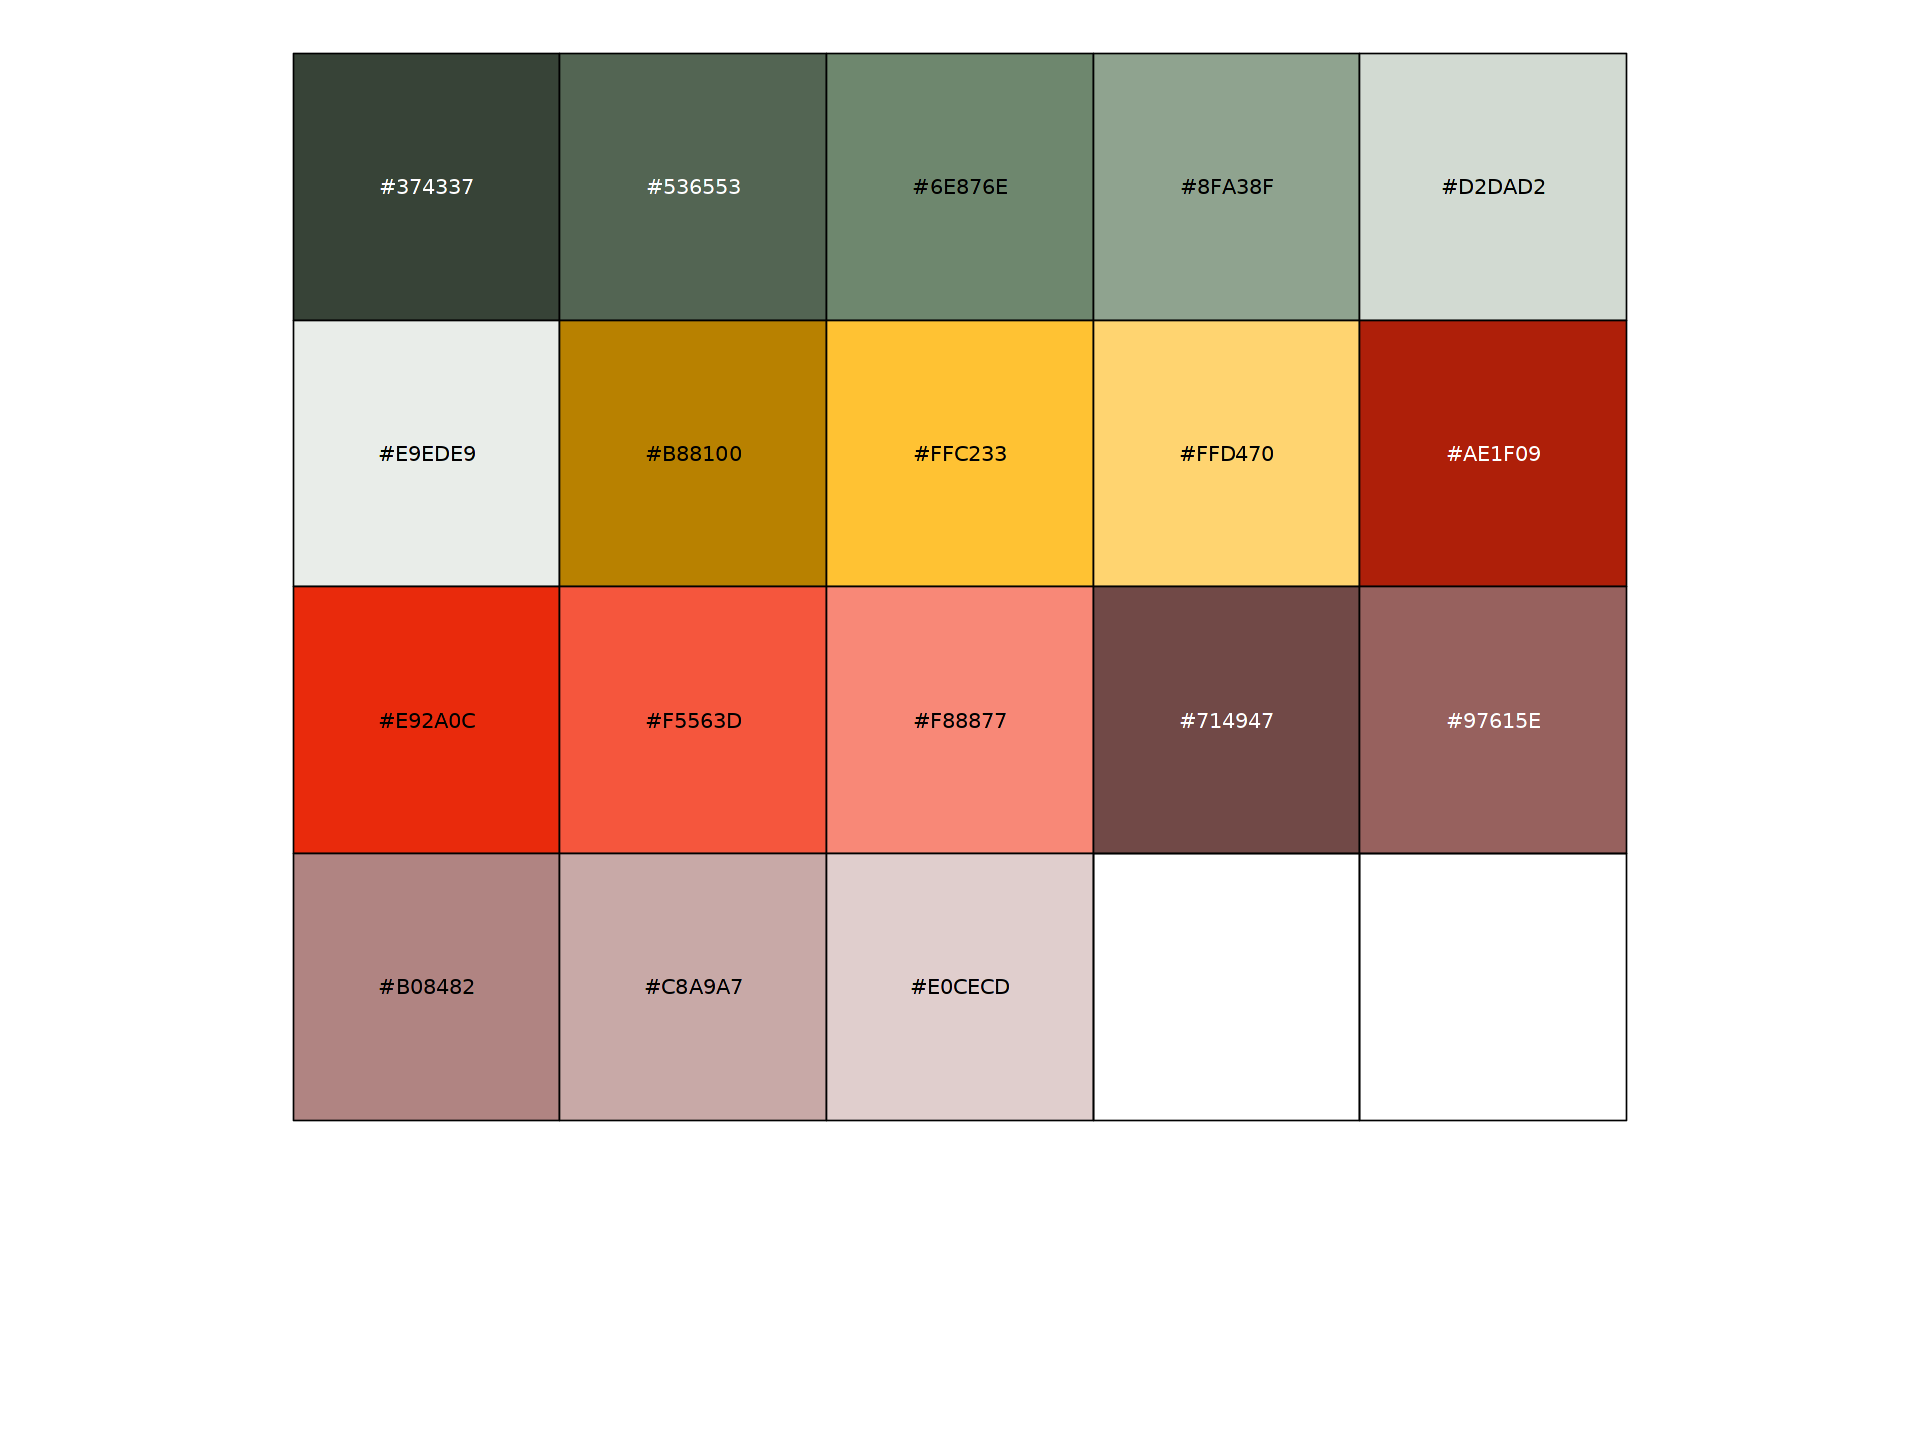

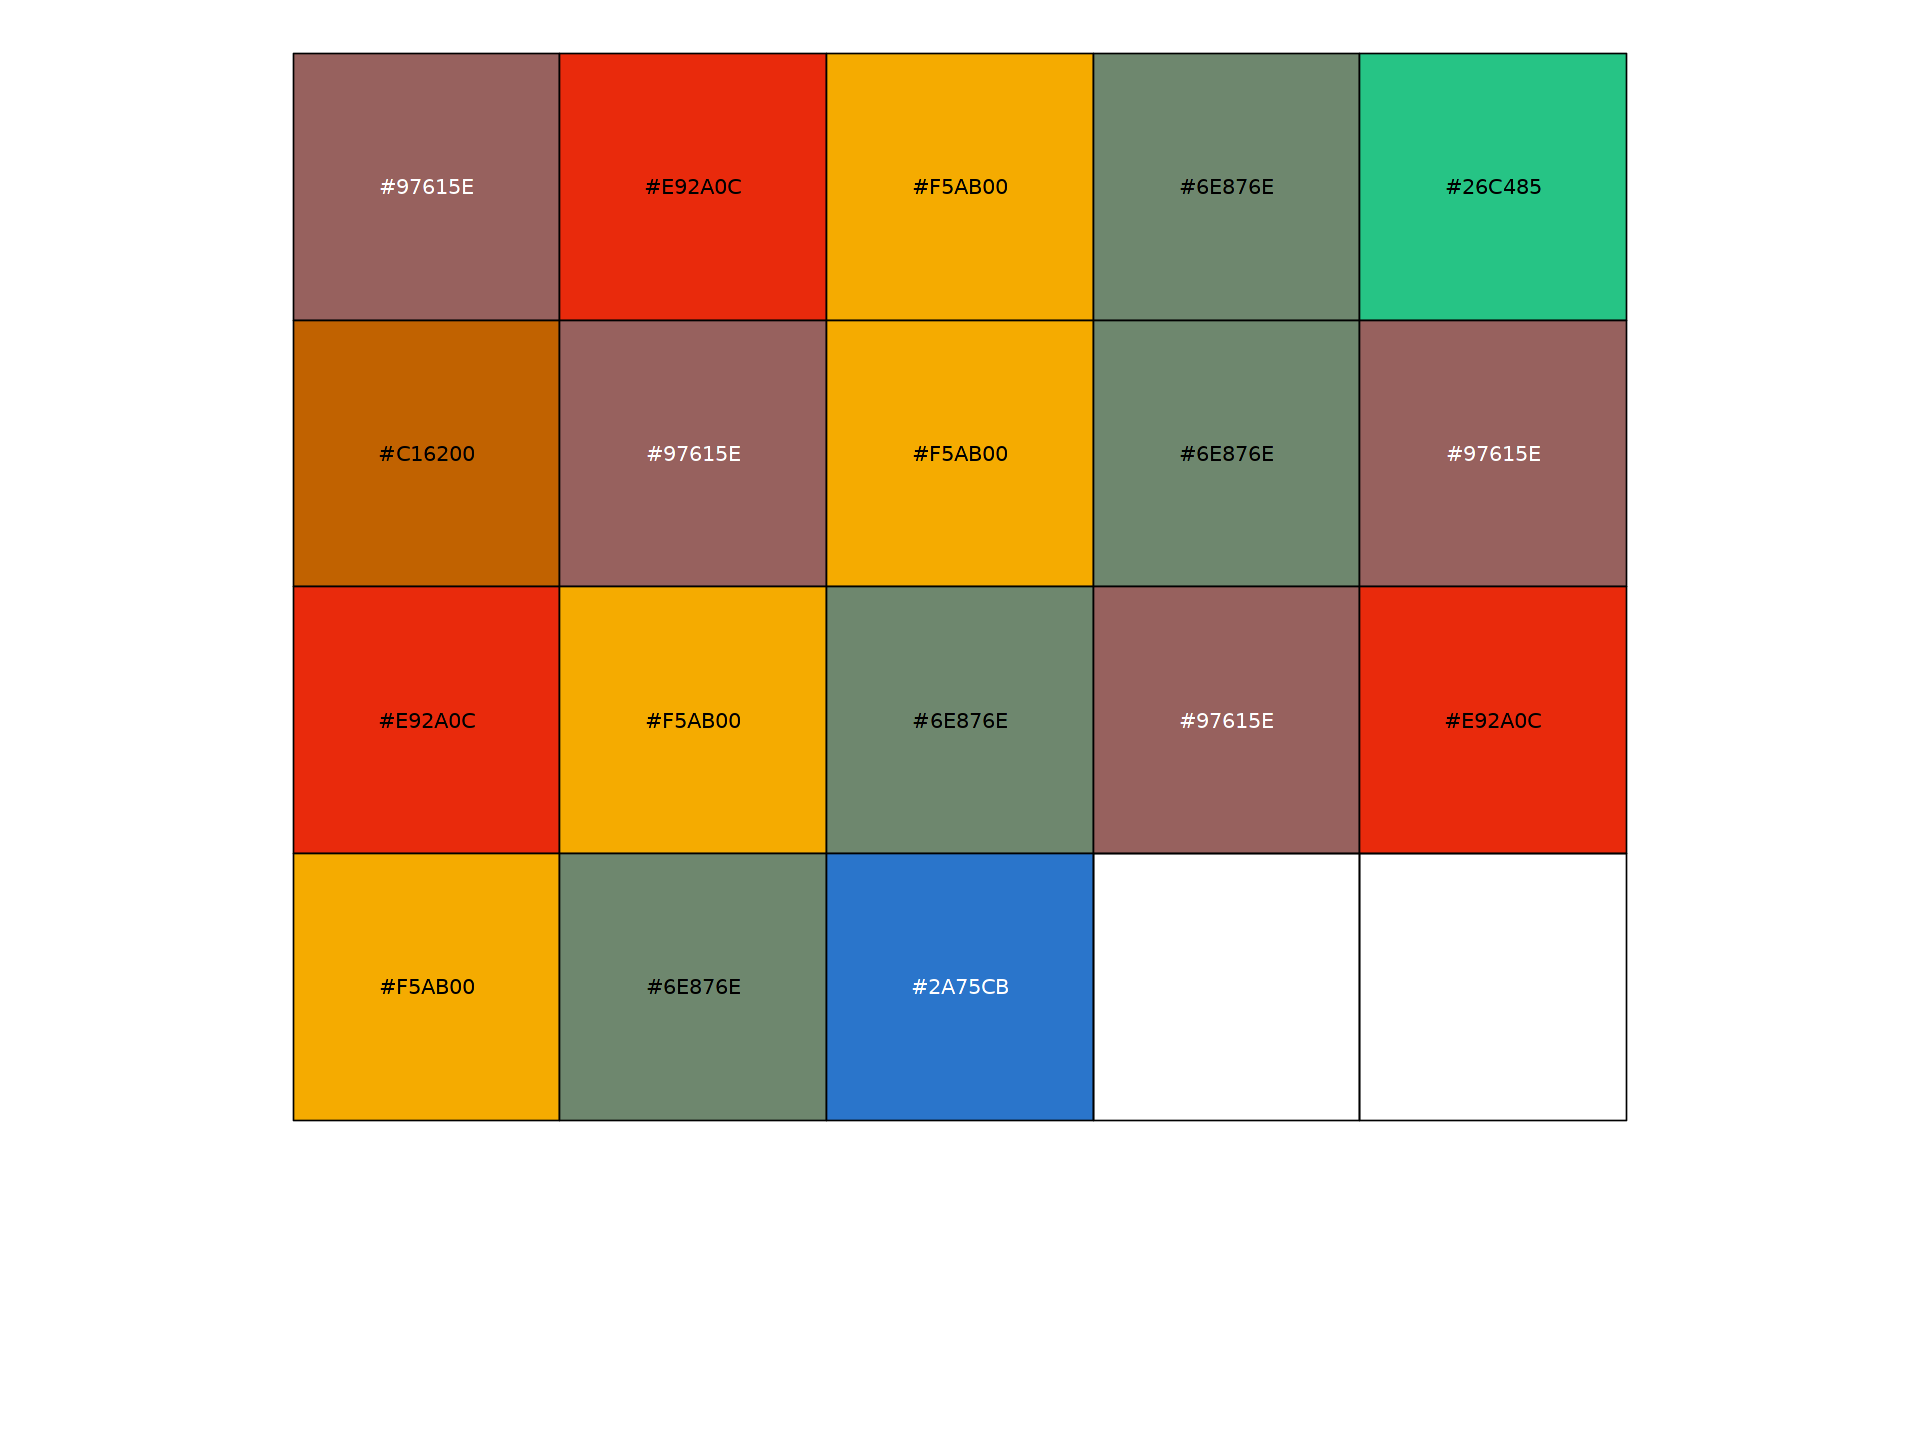

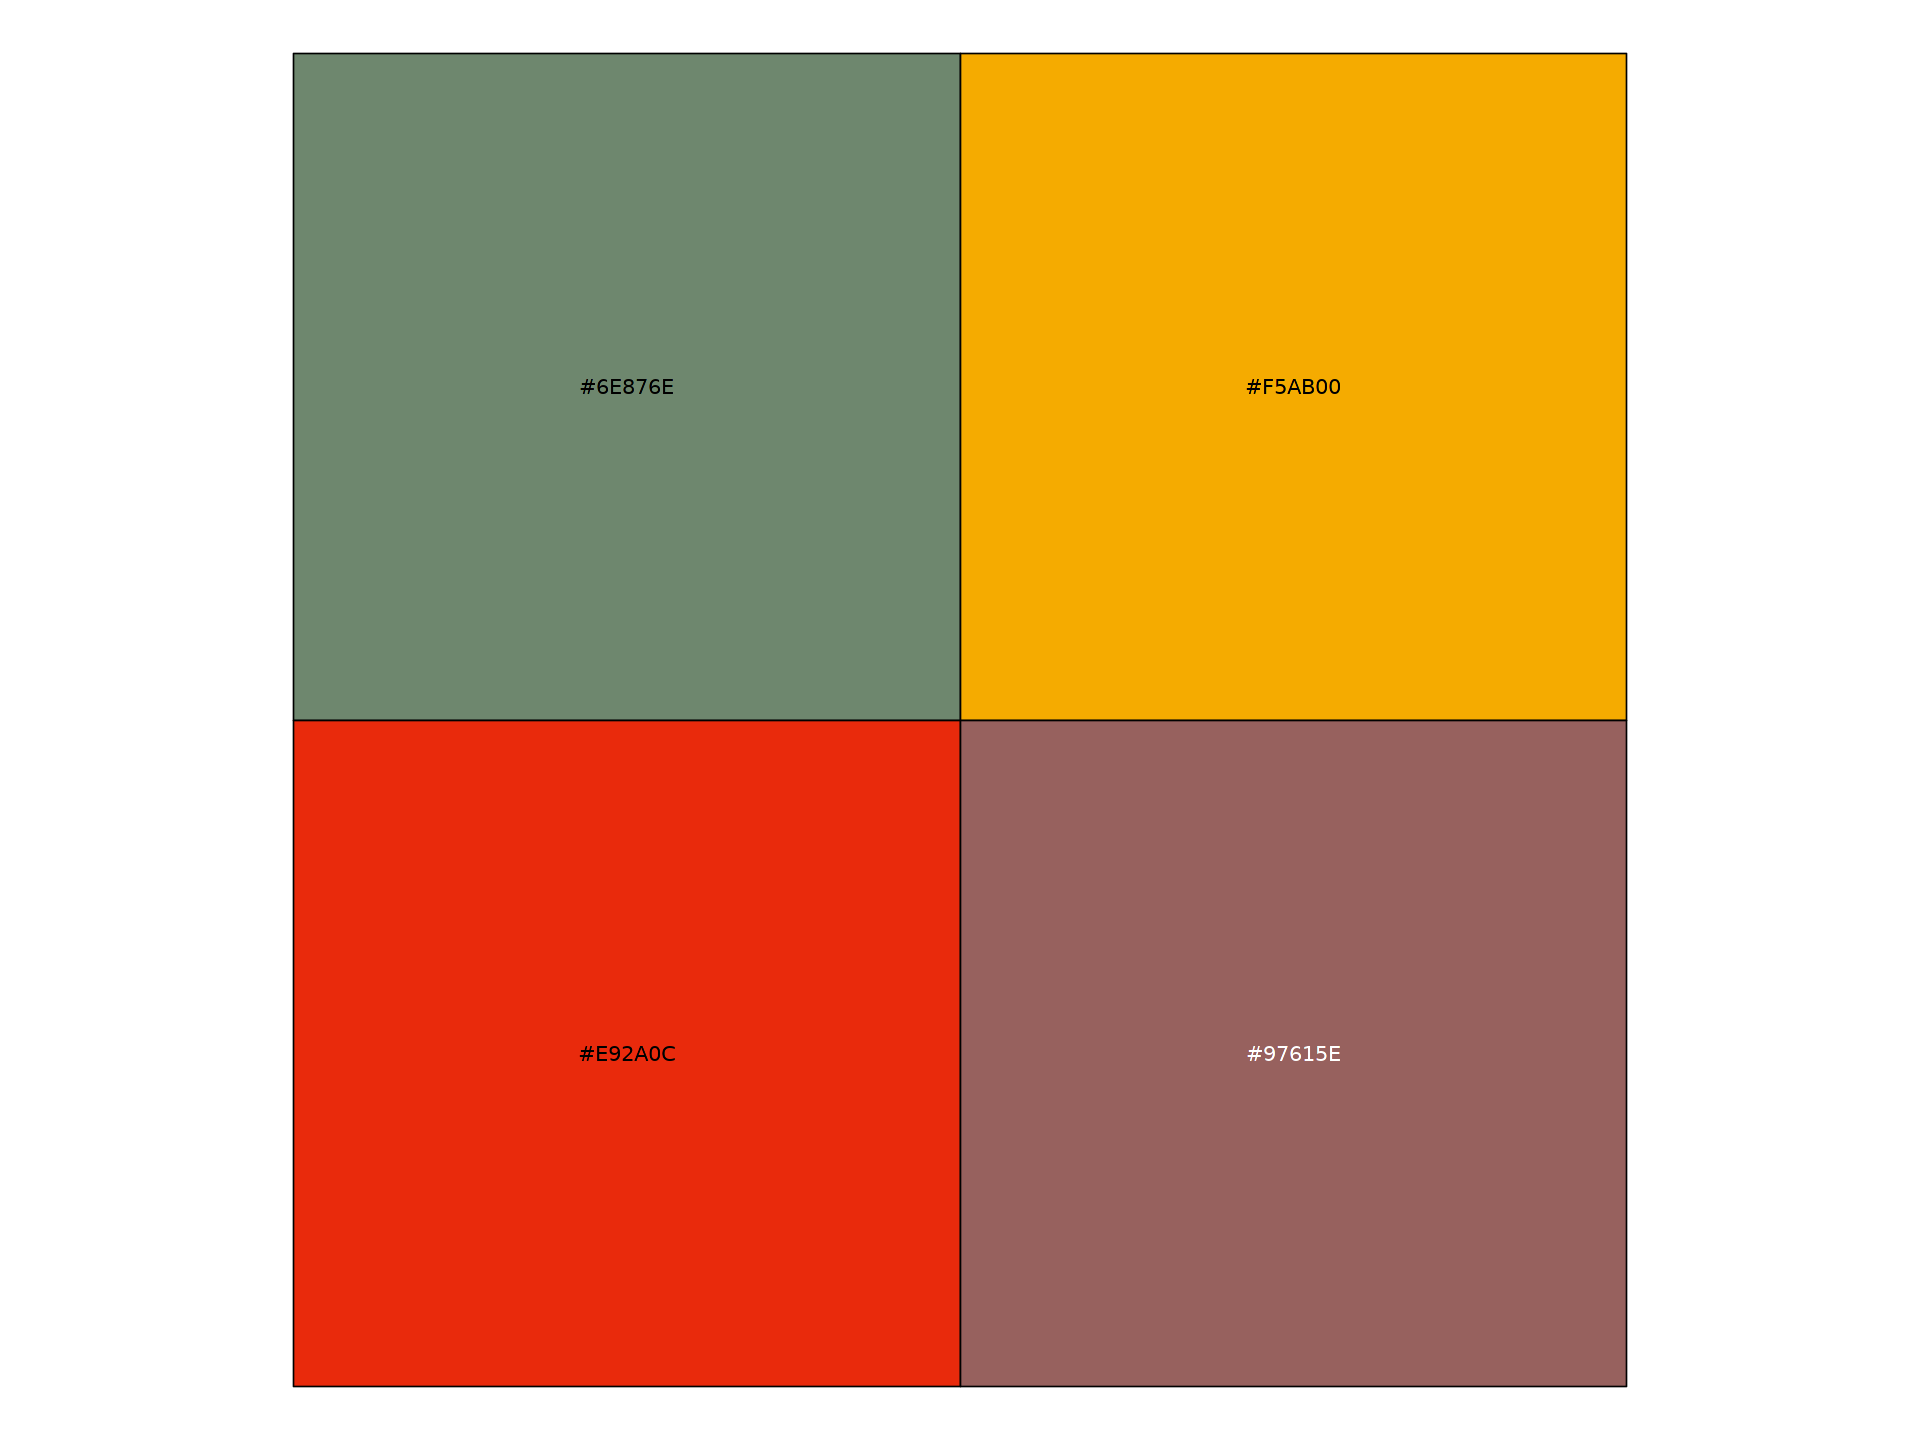

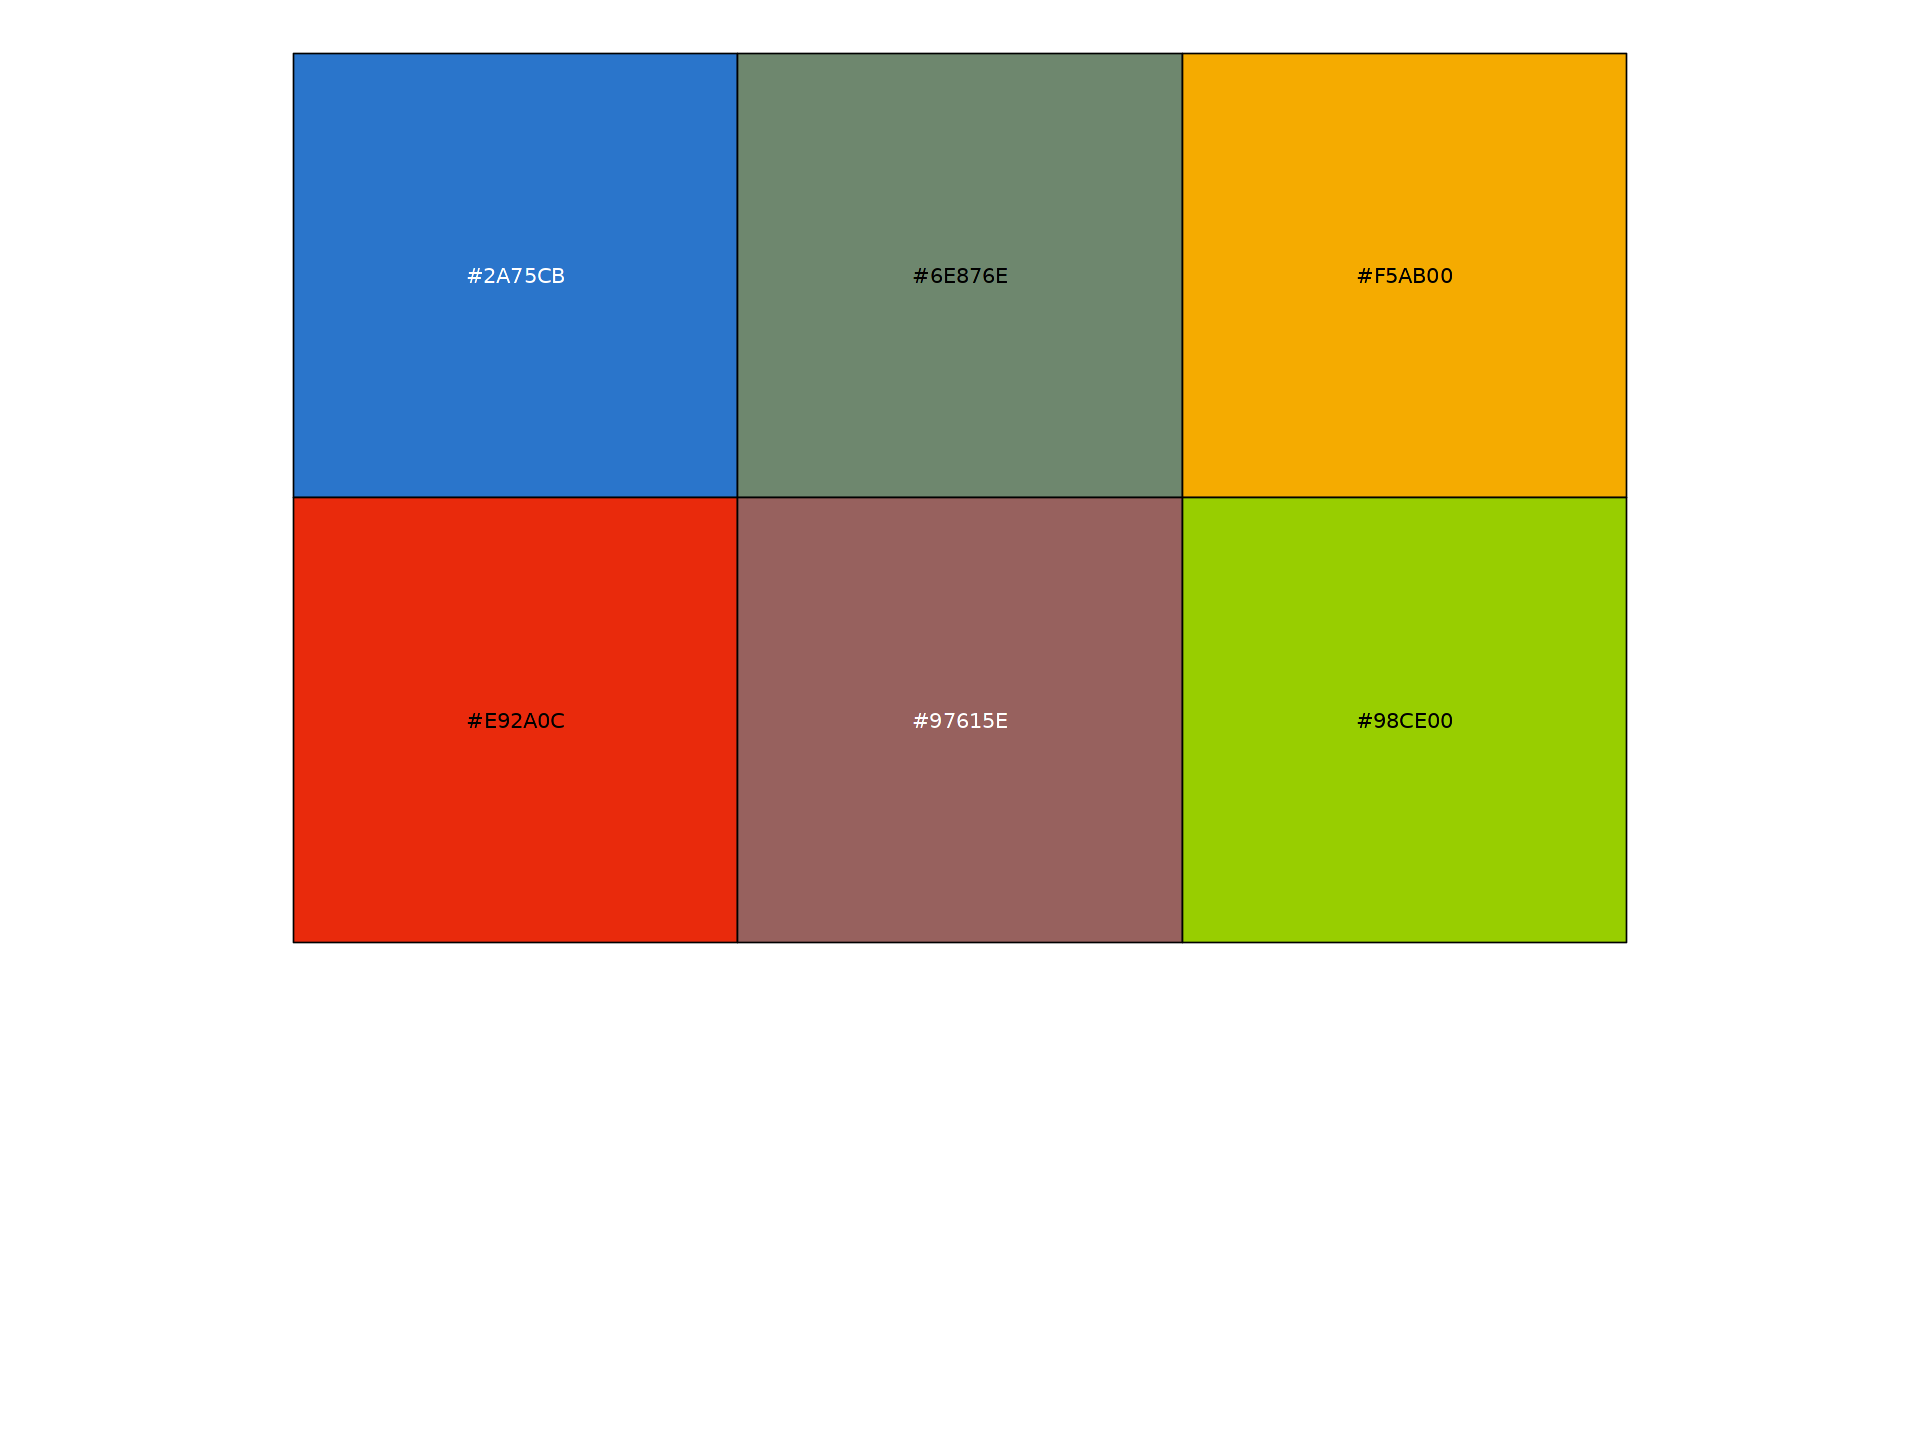

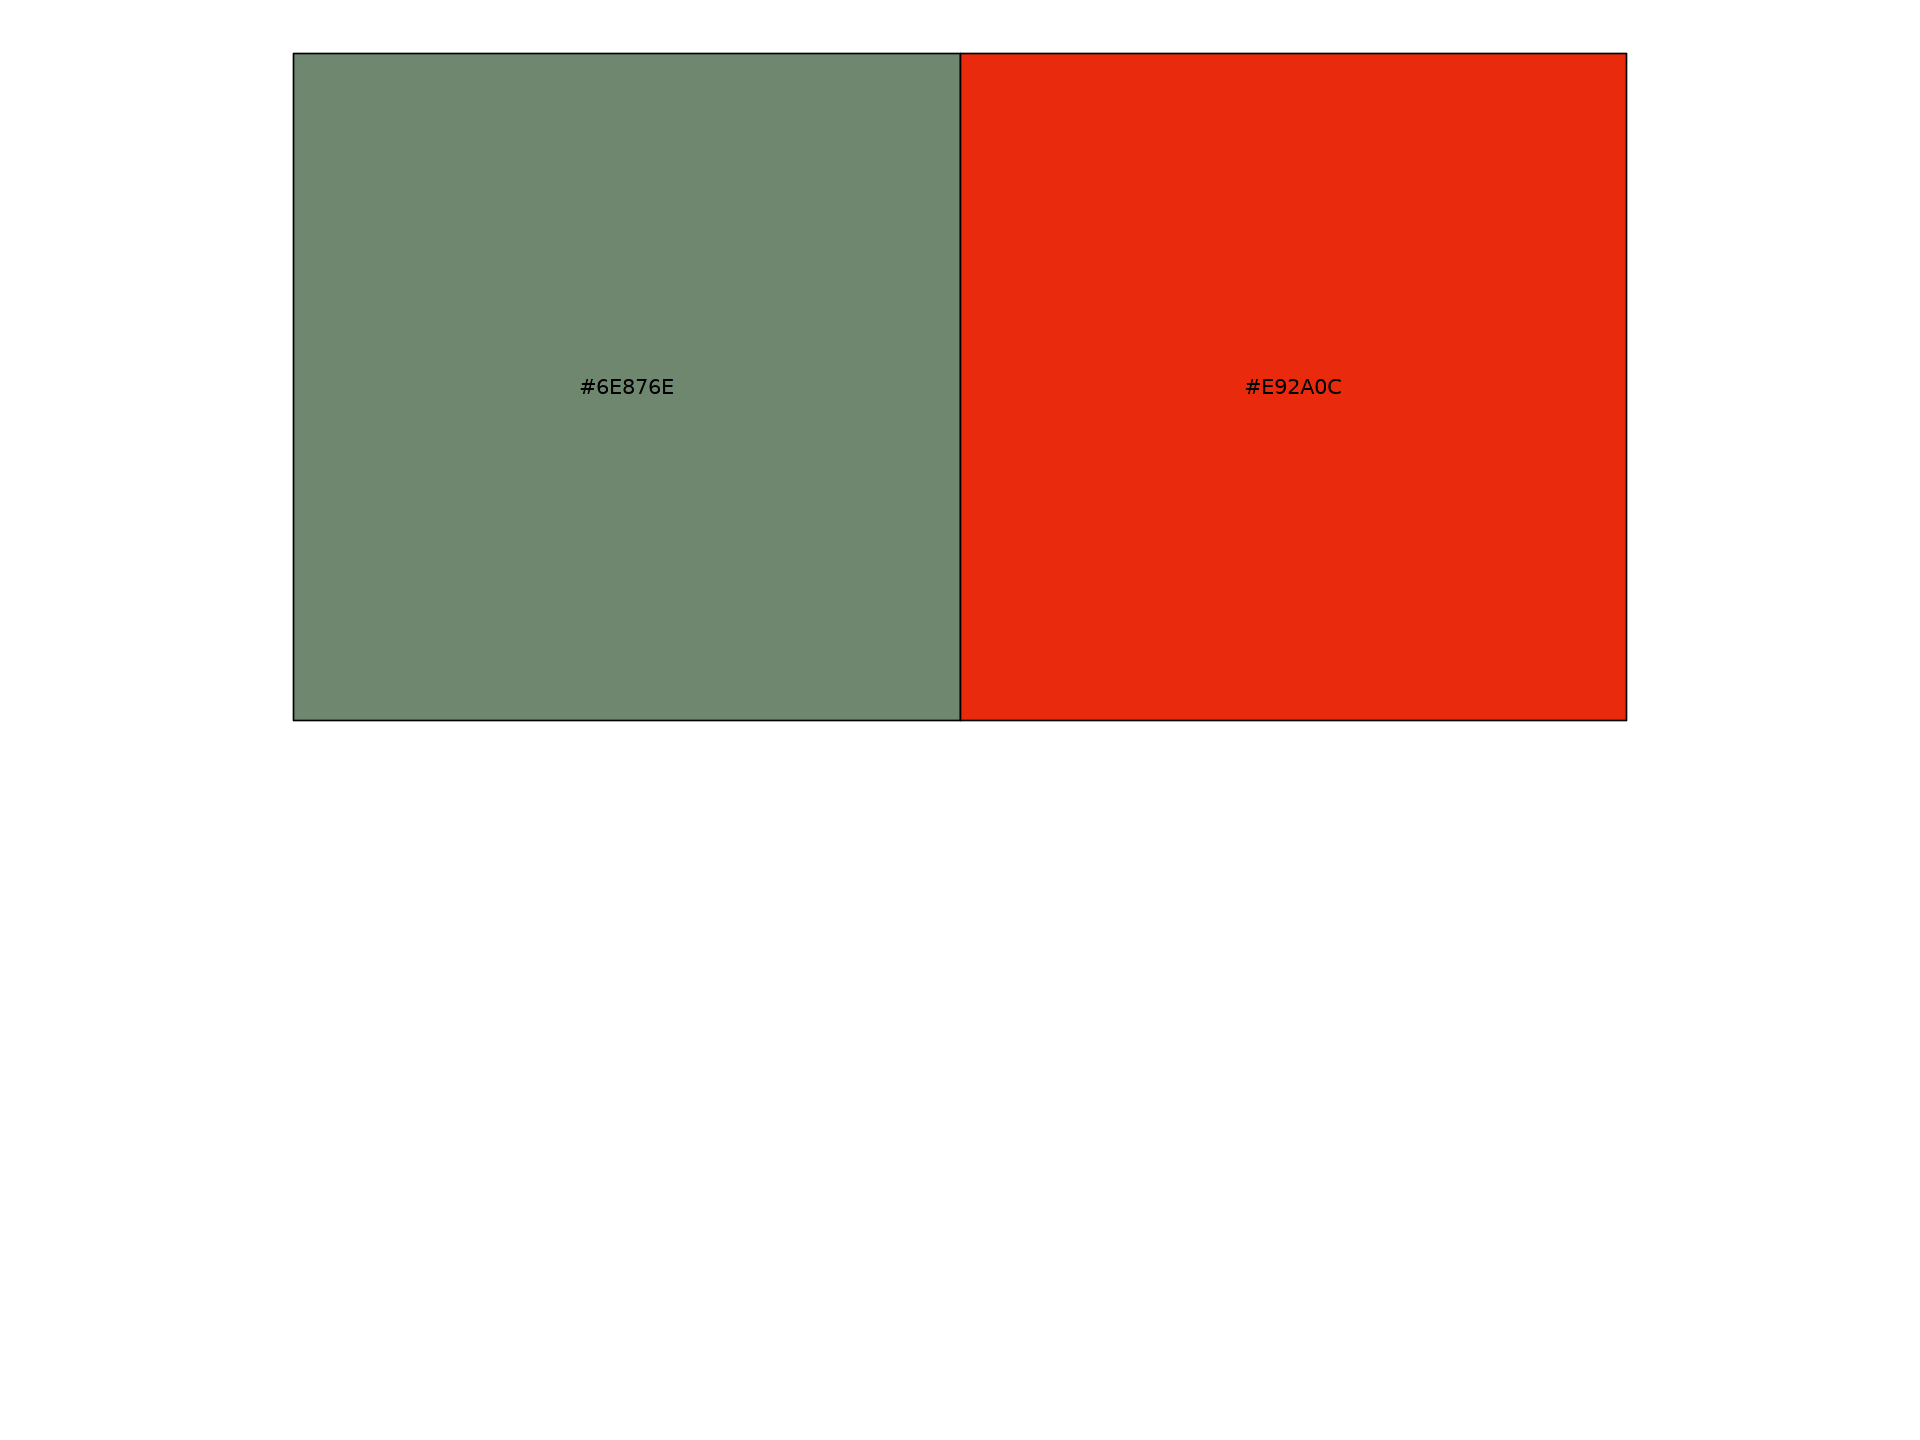

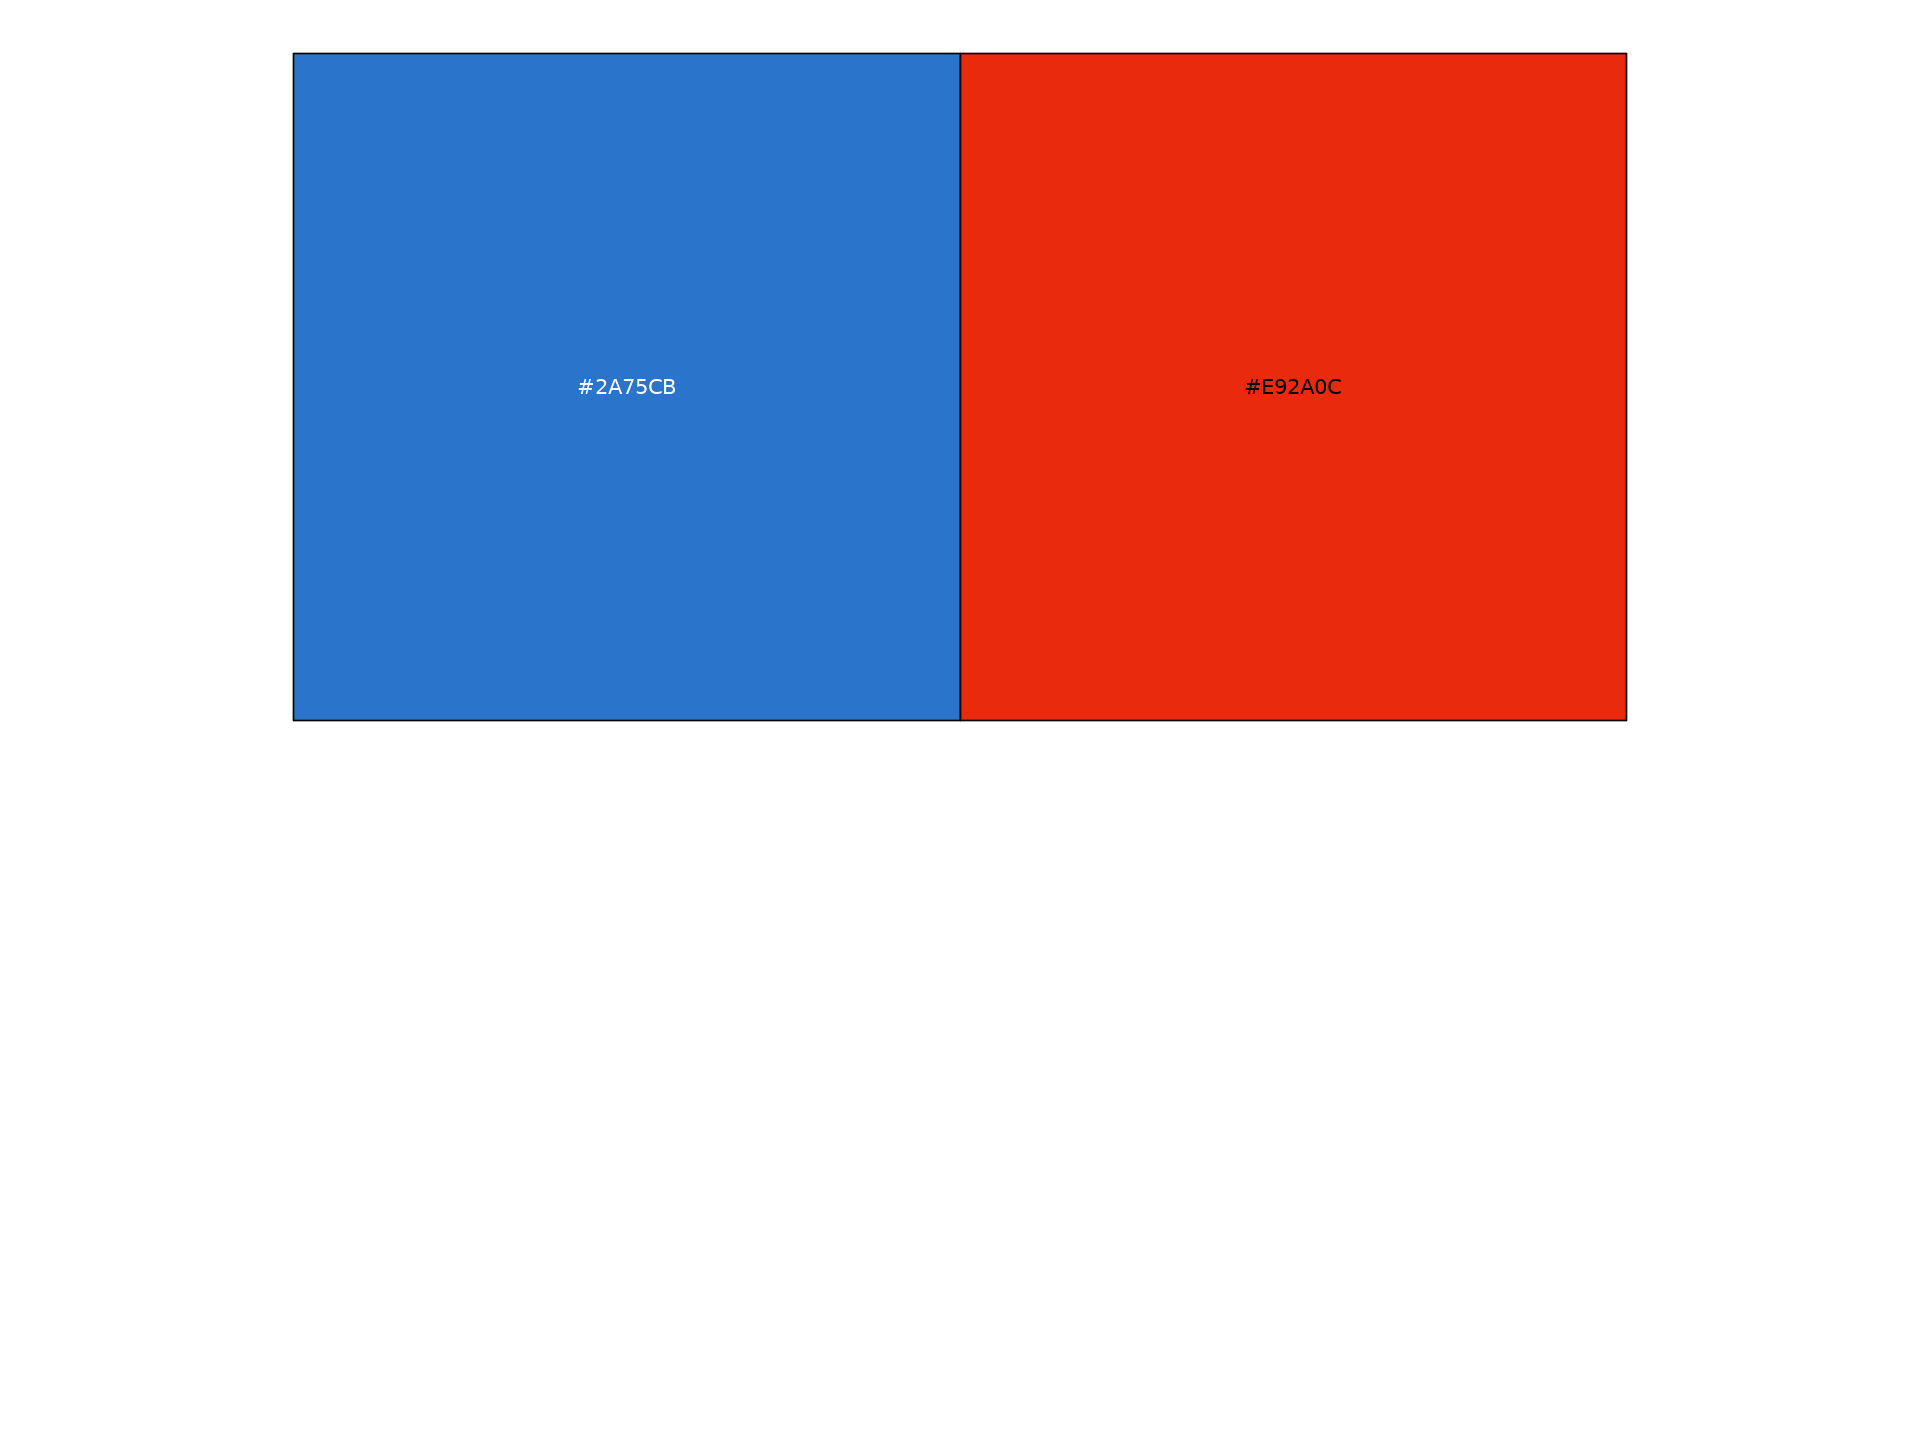

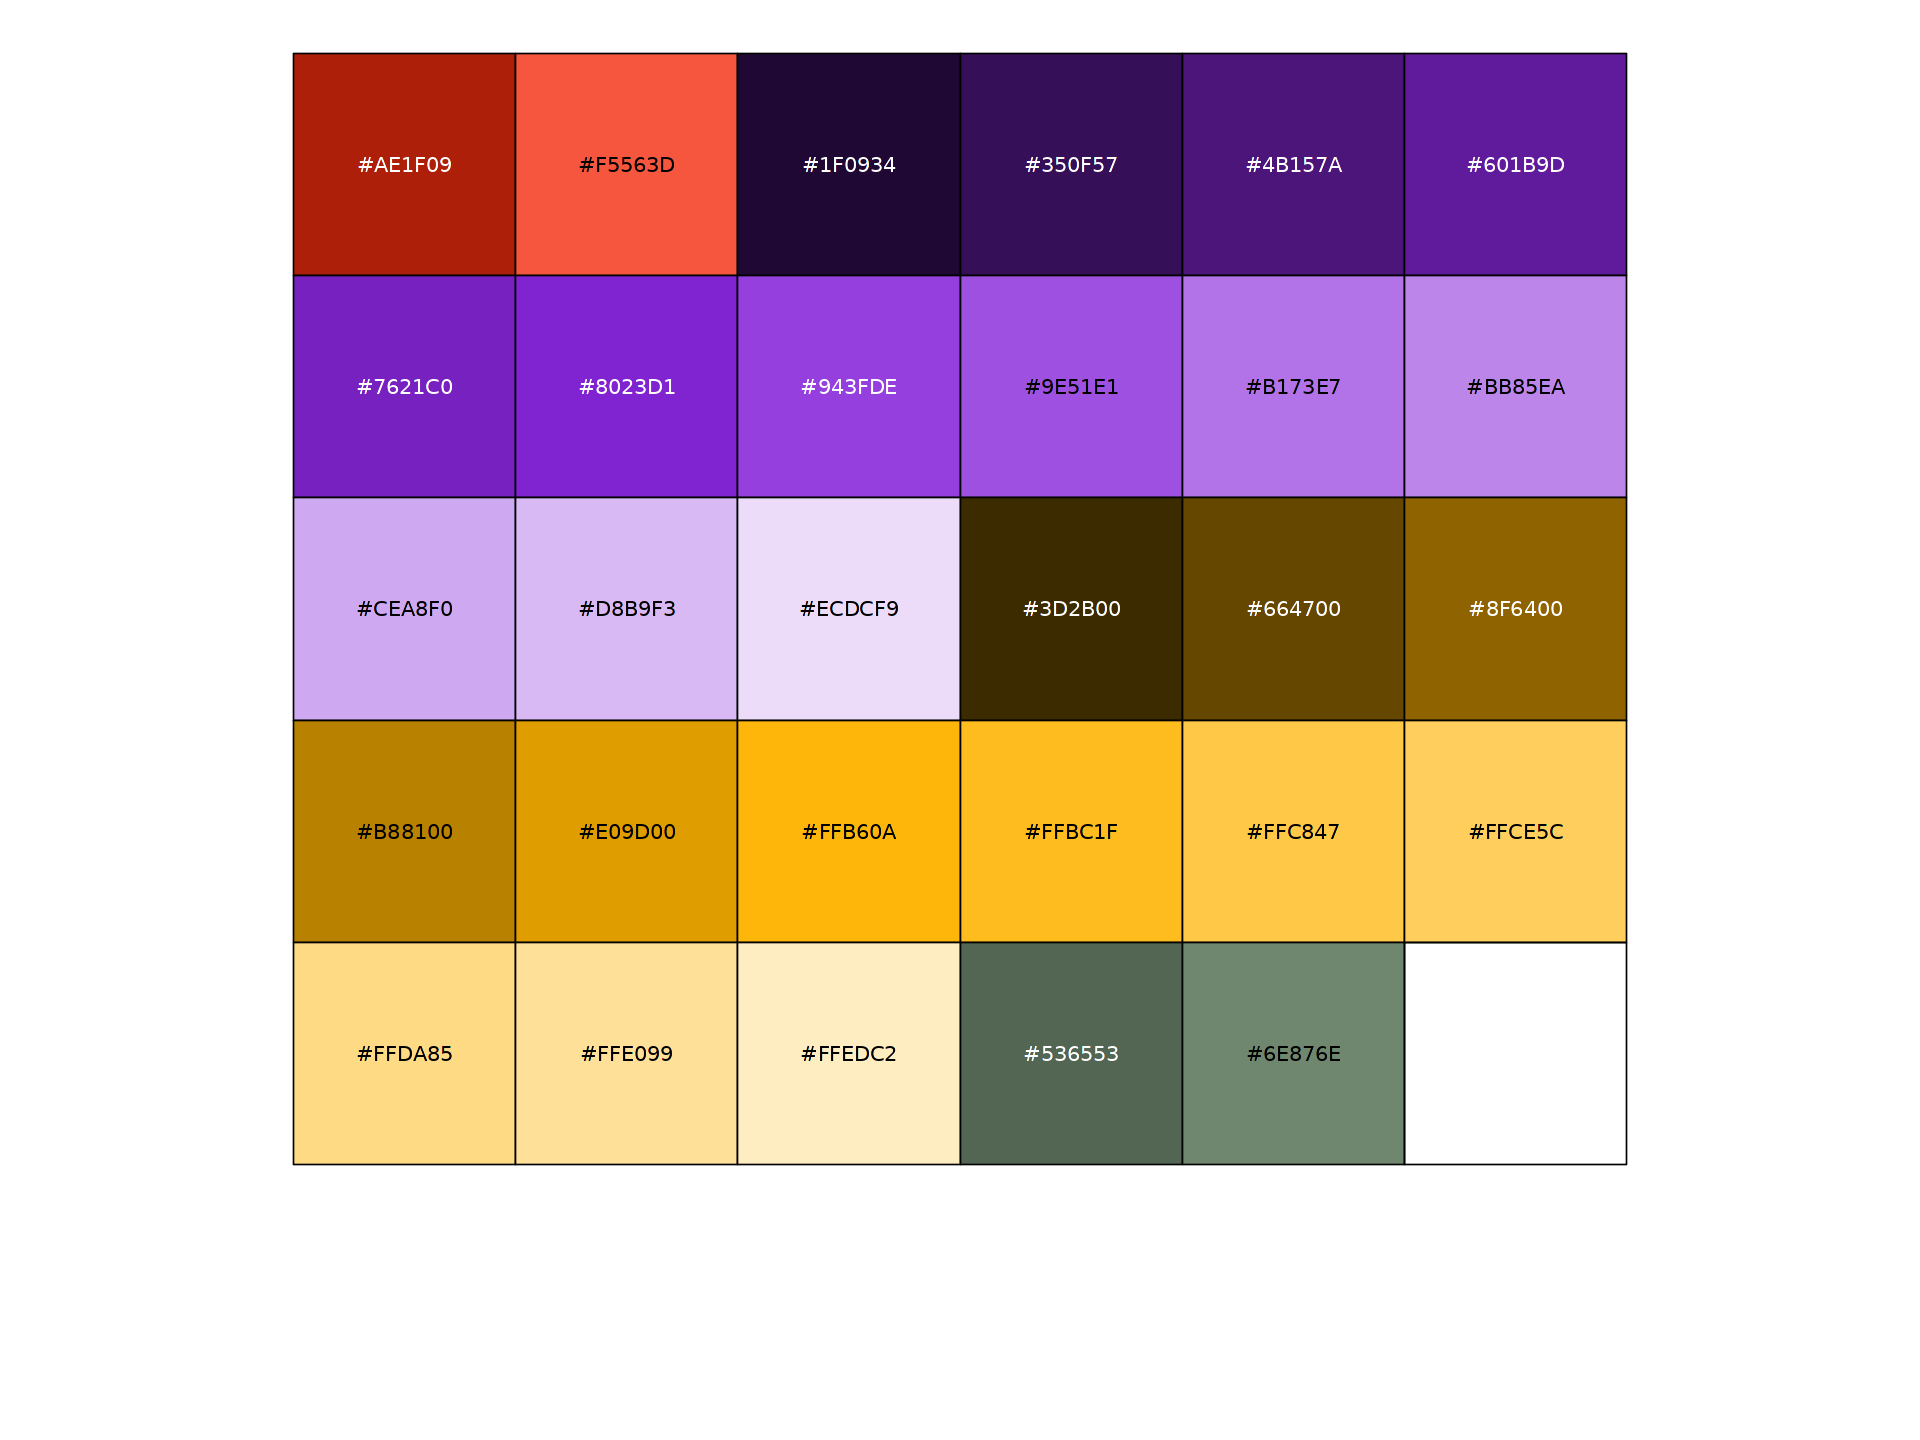

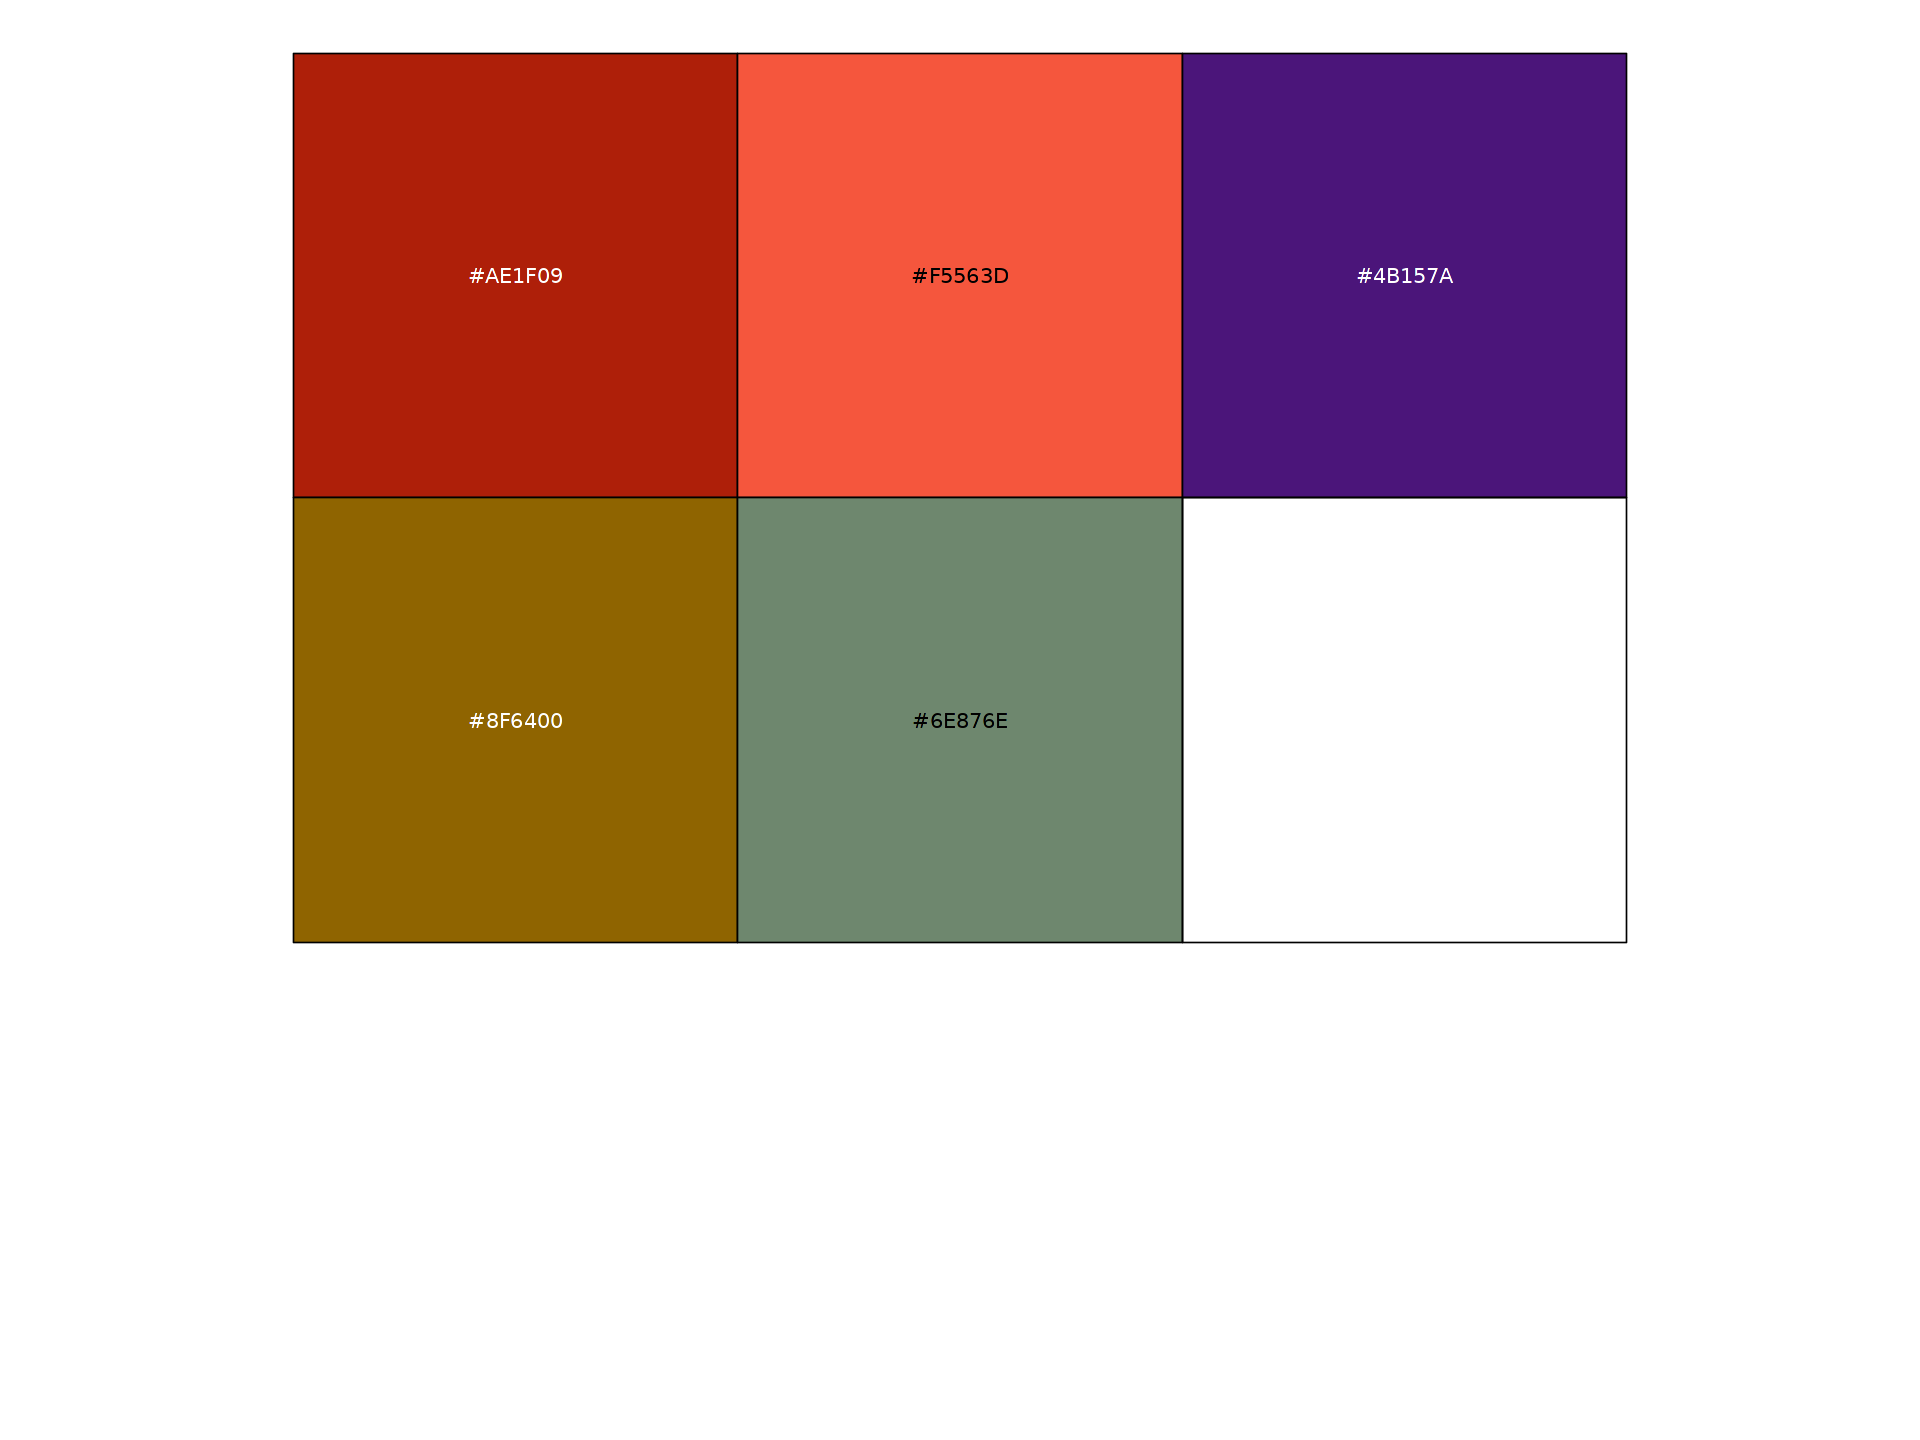

In [7]:
orig.ident_colors <- c("#374337", "#536553", "#6E876E", "#8FA38F", "#D2DAD2", "#E9EDE9", "#B88100", "#FFC233", "#FFD470", "#AE1F09", "#E92A0C", "#F5563D", "#F88877", "#714947", "#97615E", "#B08482", "#C8A9A7", "#E0CECD")
names(orig.ident_colors) <- c("EarlyCtrl2", "EarlyCtrl3", "PeakCtrl2", "PeakCtrl3", "LateCtrl2", "LateCtrl3", "Early1", "EarlyMale3", "EarlyFemale3", "Peak2", "Peak3", "PeakMale4", "PeakFemale4", "Late1", "Late2","Late3", "LateMale4", "LateFemale4")
show_col(orig.ident_colors)
orig.ident_colors_contrast <- c("#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#26C485", "#C16200", "#97615E", "#F5AB00", "#6E876E", "#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#2A75CB")
names(orig.ident_colors_contrast) <- c("EarlyCtrl2", "EarlyCtrl3", "PeakCtrl2", "PeakCtrl3", "LateCtrl2", "LateCtrl3", "Early1", "EarlyMale3", "EarlyFemale3", "Peak2", "Peak3", "PeakMale4", "PeakFemale4", "Late1", "Late2","Late3", "LateMale4", "LateFemale4")
show_col(orig.ident_colors_contrast)

orig.ident_merge_colors <- c("#6E876E", "#F5AB00", "#E92A0C", "#97615E")
names(orig.ident_merge_colors) <- c("Ctrl", "Early", "Peak", "Late")
show_col(orig.ident_merge_colors)

batch_colors <- c("#2A75CB", "#6E876E", "#F5AB00", "#E92A0C", "#97615E", "#98CE00")
names(batch_colors) <- c("B1", "B2", "B3", "B4", "B5", "B6")
show_col(batch_colors)

model_colors <- c("#6E876E", "#E92A0C")
names(model_colors) <- c("Ctrl", "EAE")
show_col(model_colors)

duo_colors <- c("#2A75CB", "#E92A0C")
show_col(duo_colors)

sex_colors <- duo_colors
names(sex_colors) <- c("M", "F")

immune_colors <- c("#A9DFBF", "#FF000080")
names(immune_colors) <- c("NonImmune", "Immune")
#show_col(immune_colors)

doublets_colors <- c("#A9DFBF", "#FF000080")
names(doublets_colors) <- c("Singlet", "Doublet")
#show_col(doublets_colors)

cellType_OL_colors <- c("#AE1F09","#F5563D", "#1F0934", "#350F57", "#4B157A", "#601B9D", "#7621C0", "#8023D1", "#943FDE", "#9E51E1", "#B173E7", "#BB85EA", "#CEA8F0", "#D8B9F3", "#ECDCF9","#3D2B00", "#664700", "#8F6400", "#B88100", "#E09D00", "#FFB60A", "#FFBC1F", "#FFC847", "#FFCE5C", "#FFDA85", "#FFE099", "#FFEDC2"
,"#536553", "#6E876E")
names(cellType_OL_colors) <- c("OPC", "COP", "MOL56-α","MOL56-β","MOL56-γ","MOL56-δ","MOL56-ε","MOL56-ζ","MOL56-η","MOL56-θ","MOL56-ι","MOL56-κ","MOL56-λ","MOL56-μ","MOL56-ν","MOL2-α","MOL2-β","MOL2-γ","MOL2-δ","MOL2-ε","MOL2-ζ","MOL2-η","MOL2-θ","MOL2-ι","MOL2-κ","MOL2-λ","MOL2-μ",
 "MOL1-α", "MOL1-β")
show_col(cellType_OL_colors)

cellType_OL_merge_colors <- c("#AE1F09","#F5563D","#4B157A","#8F6400", "#6E876E")
names(cellType_OL_merge_colors) <- c("OPC", "COP", "MOL56", "MOL2", "MOL1")
show_col(cellType_OL_merge_colors)

In [8]:
%put OS_path_datasets OS_path_outputs OS_path_inputs

In [9]:
#Set up ATAC annotation
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79, verbose =FALSE)
ucsc.levels <- str_replace(string=paste("chr",seqlevels(annotations),sep=""), pattern="chrMT", replacement="chrM")
seqlevels(annotations) <- ucsc.levels
genome(annotations) <- "mm10"

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

## 2. Loading datasets

In [10]:
MORNAATACCOL <- readRDS(paste0(OS_path_outputs, "MORNAATACCOL.rds"))

## 3. Common genes DGE/DGA

In [11]:
DGE_OL <- readRDS(paste0(OS_path_outputs, "DGE_OL_cov.rds"))
DGA_OL <- readRDS(paste0(OS_path_outputs, "DGA_OL_cov.rds"))

In [12]:
length(unique(unlist(DGE_OL[["MOL56"]])))
length(unique(unlist(DGA_OL[["MOL56"]])))
length(unique(unlist(DGE_OL[["MOL2"]])))
length(unique(unlist(DGA_OL[["MOL2"]])))

[1] 1456

[1] 332

[1] 3214

[1] 631

In [13]:
MOL56_commun <- intersect(unique(unlist(DGE_OL[["MOL56"]])),unique(unlist(DGA_OL[["MOL56"]])))
MOL2_commun <- intersect(unique(unlist(DGE_OL[["MOL2"]])),unique(unlist(DGA_OL[["MOL2"]])))

In [14]:
length(MOL56_commun)
length(MOL2_commun)

[1] 115

[1] 188

### 3.1 MOL56

In [15]:
cluster_choice = "MOL56"

In [16]:
gene_list <- MOL56_commun

In [17]:
tmp <- subset(MORNAATACCOL, subset = cellType_OL_merge == cluster_choice)

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_peaks_ol_ to umappeaksol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_bimod_ol_ to umapbimodol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_generegchrom_ol_ to pcageneregchromol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_generegchrom_ol_ to umapgeneregchromol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_dorcs_ol_ to pcadorcsol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_dorcs_ol_ to umapdorcsol_"


In [18]:
DefaultAssay(tmp) <- "RNA"

In [19]:
ensembl = useMart("ensembl",dataset="mmusculus_gene_ensembl")
attributes = listAttributes(ensembl)
Biomart_gencode_ensembl84_biotypes <- getBM(attributes=c("mgi_symbol","ensembl_gene_id","entrezgene_id","gene_biotype"), filters = "", values = "", ensembl)
Biomart_gencode_ensembl84_biotypes[, 'gene_biotype'] <- as.factor(Biomart_gencode_ensembl84_biotypes[,'gene_biotype'])

In [20]:
#Filter for only our genes
Biotype_All_dataset <- subset(Biomart_gencode_ensembl84_biotypes, mgi_symbol %in% rownames(tmp))
entrezID <- subset(Biotype_All_dataset, Biotype_All_dataset$mgi_symbol %in% rownames(tmp))

In [21]:
entrezmatched <- entrezID[match(gene_list,entrezID$mgi_symbol),]

In [22]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [23]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [24]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

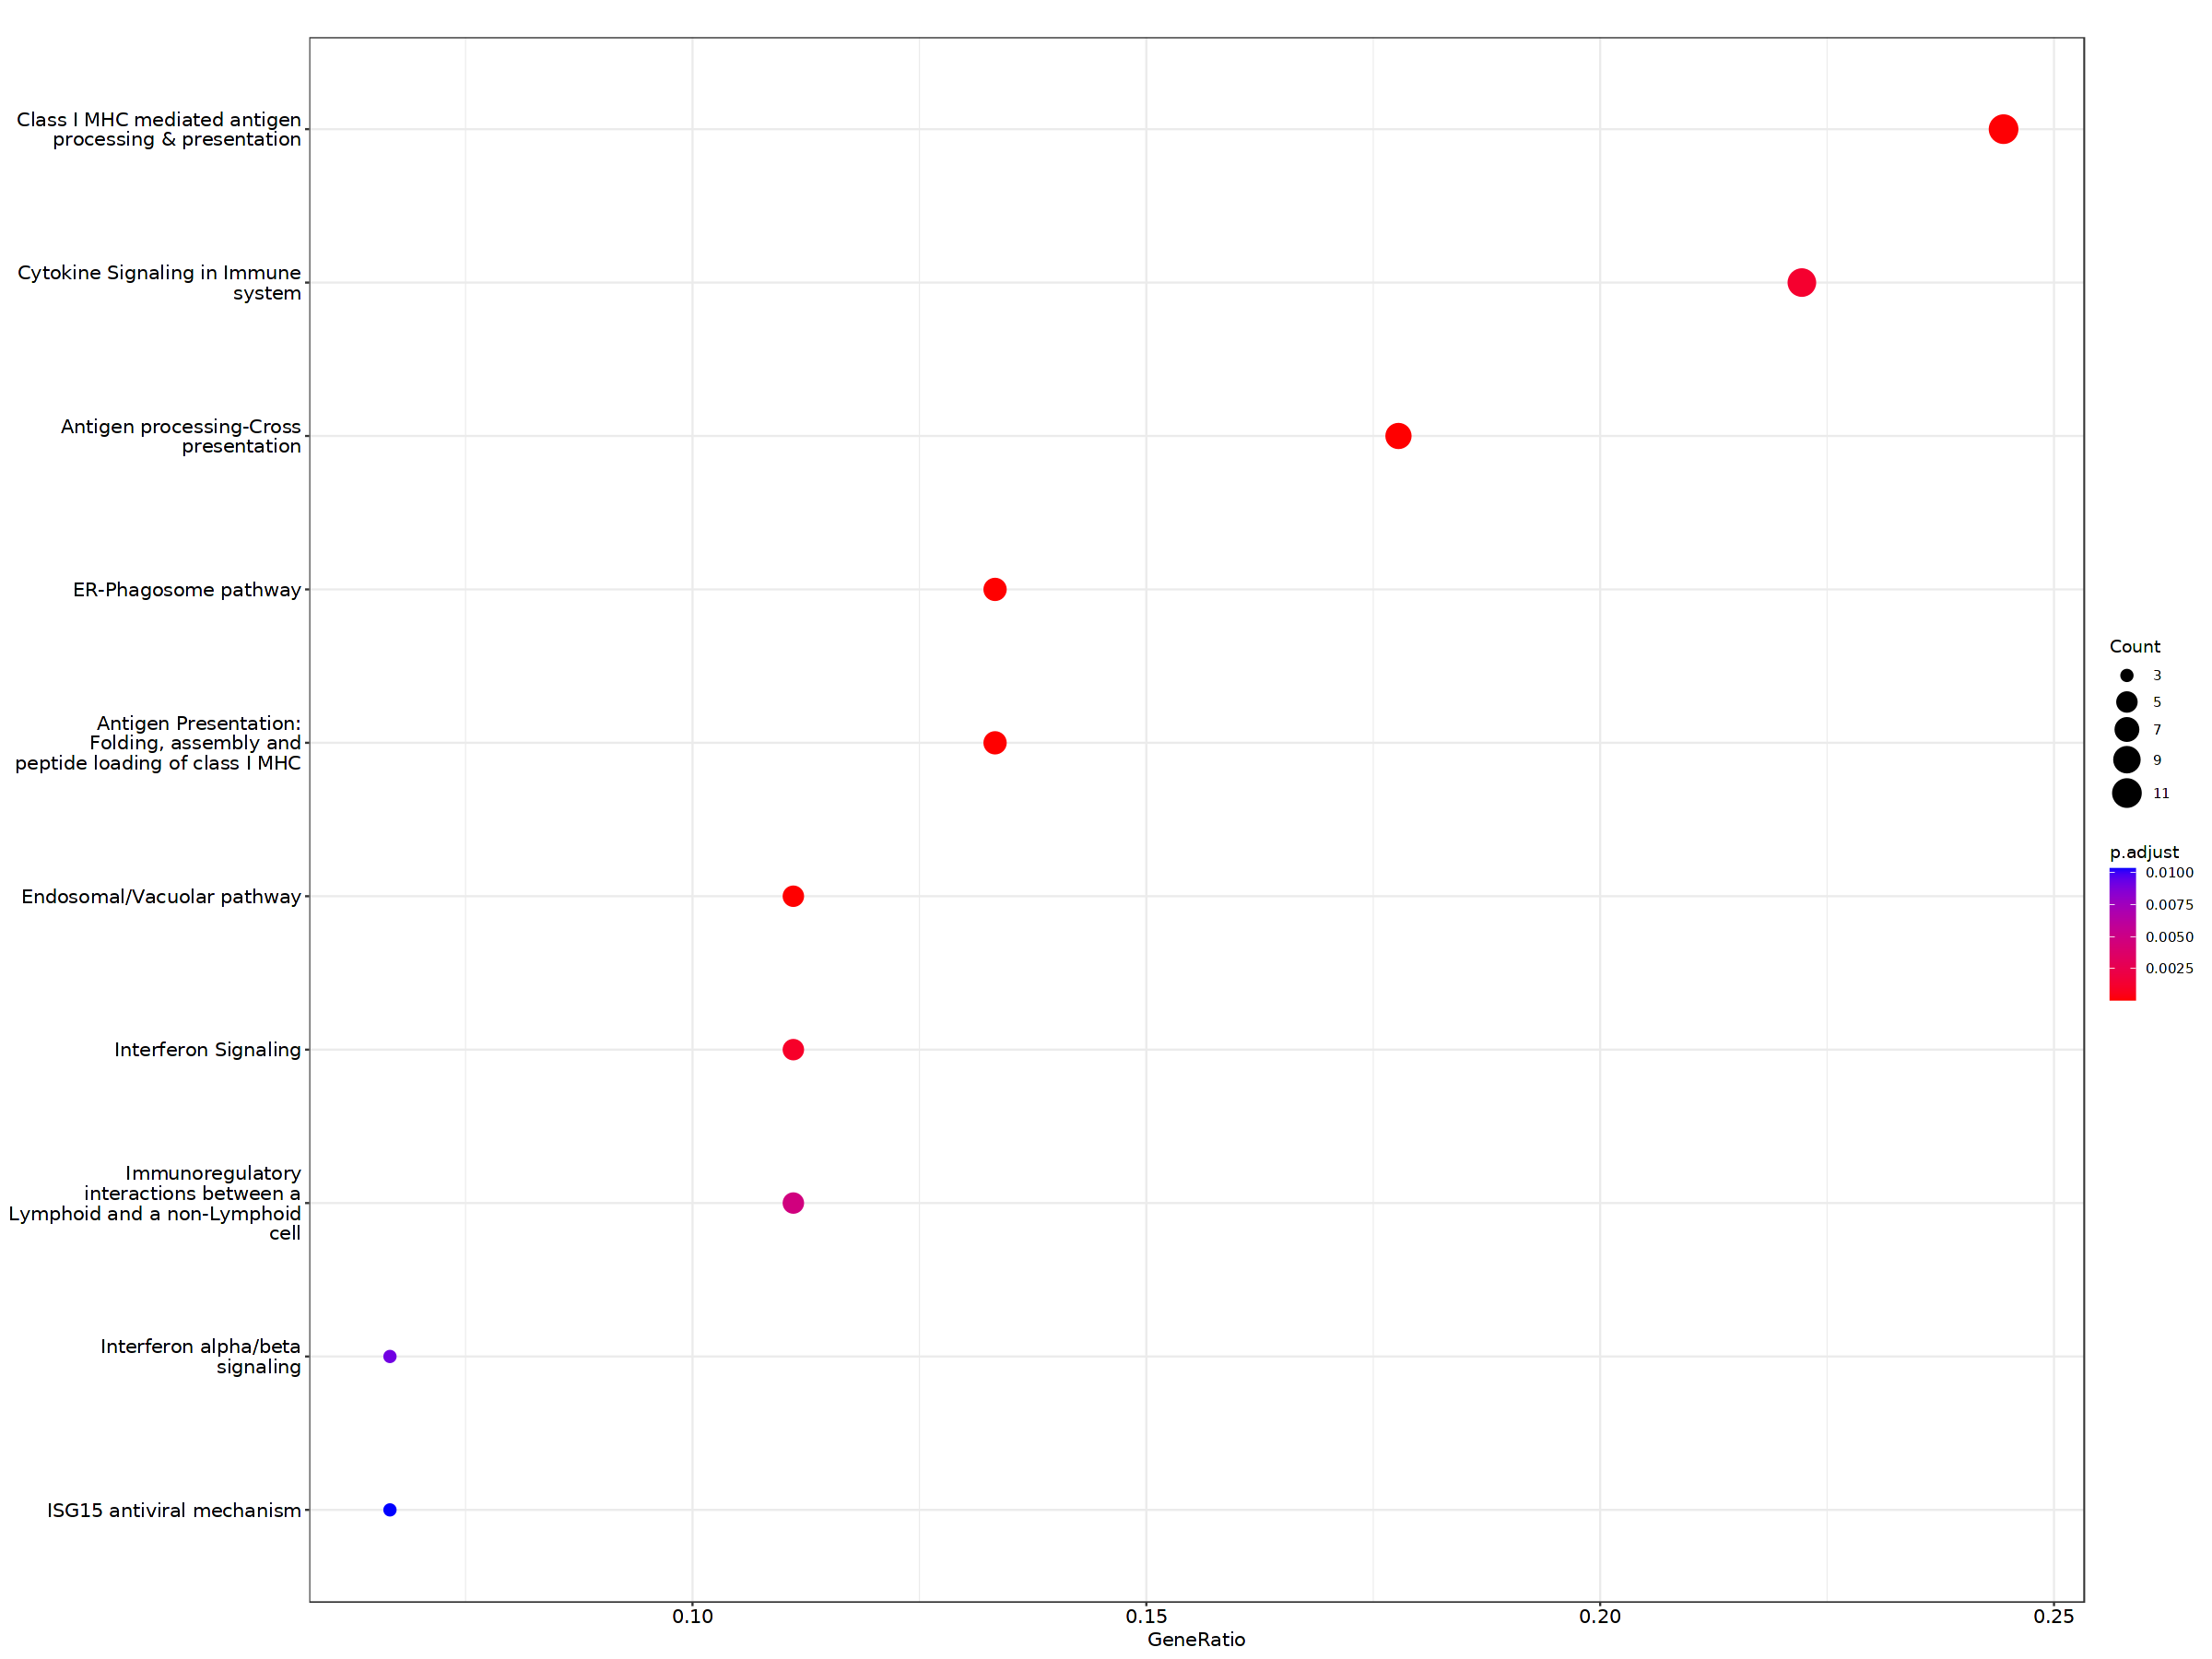

In [25]:
options(repr.plot.width=20, repr.plot.height=15)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [26]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

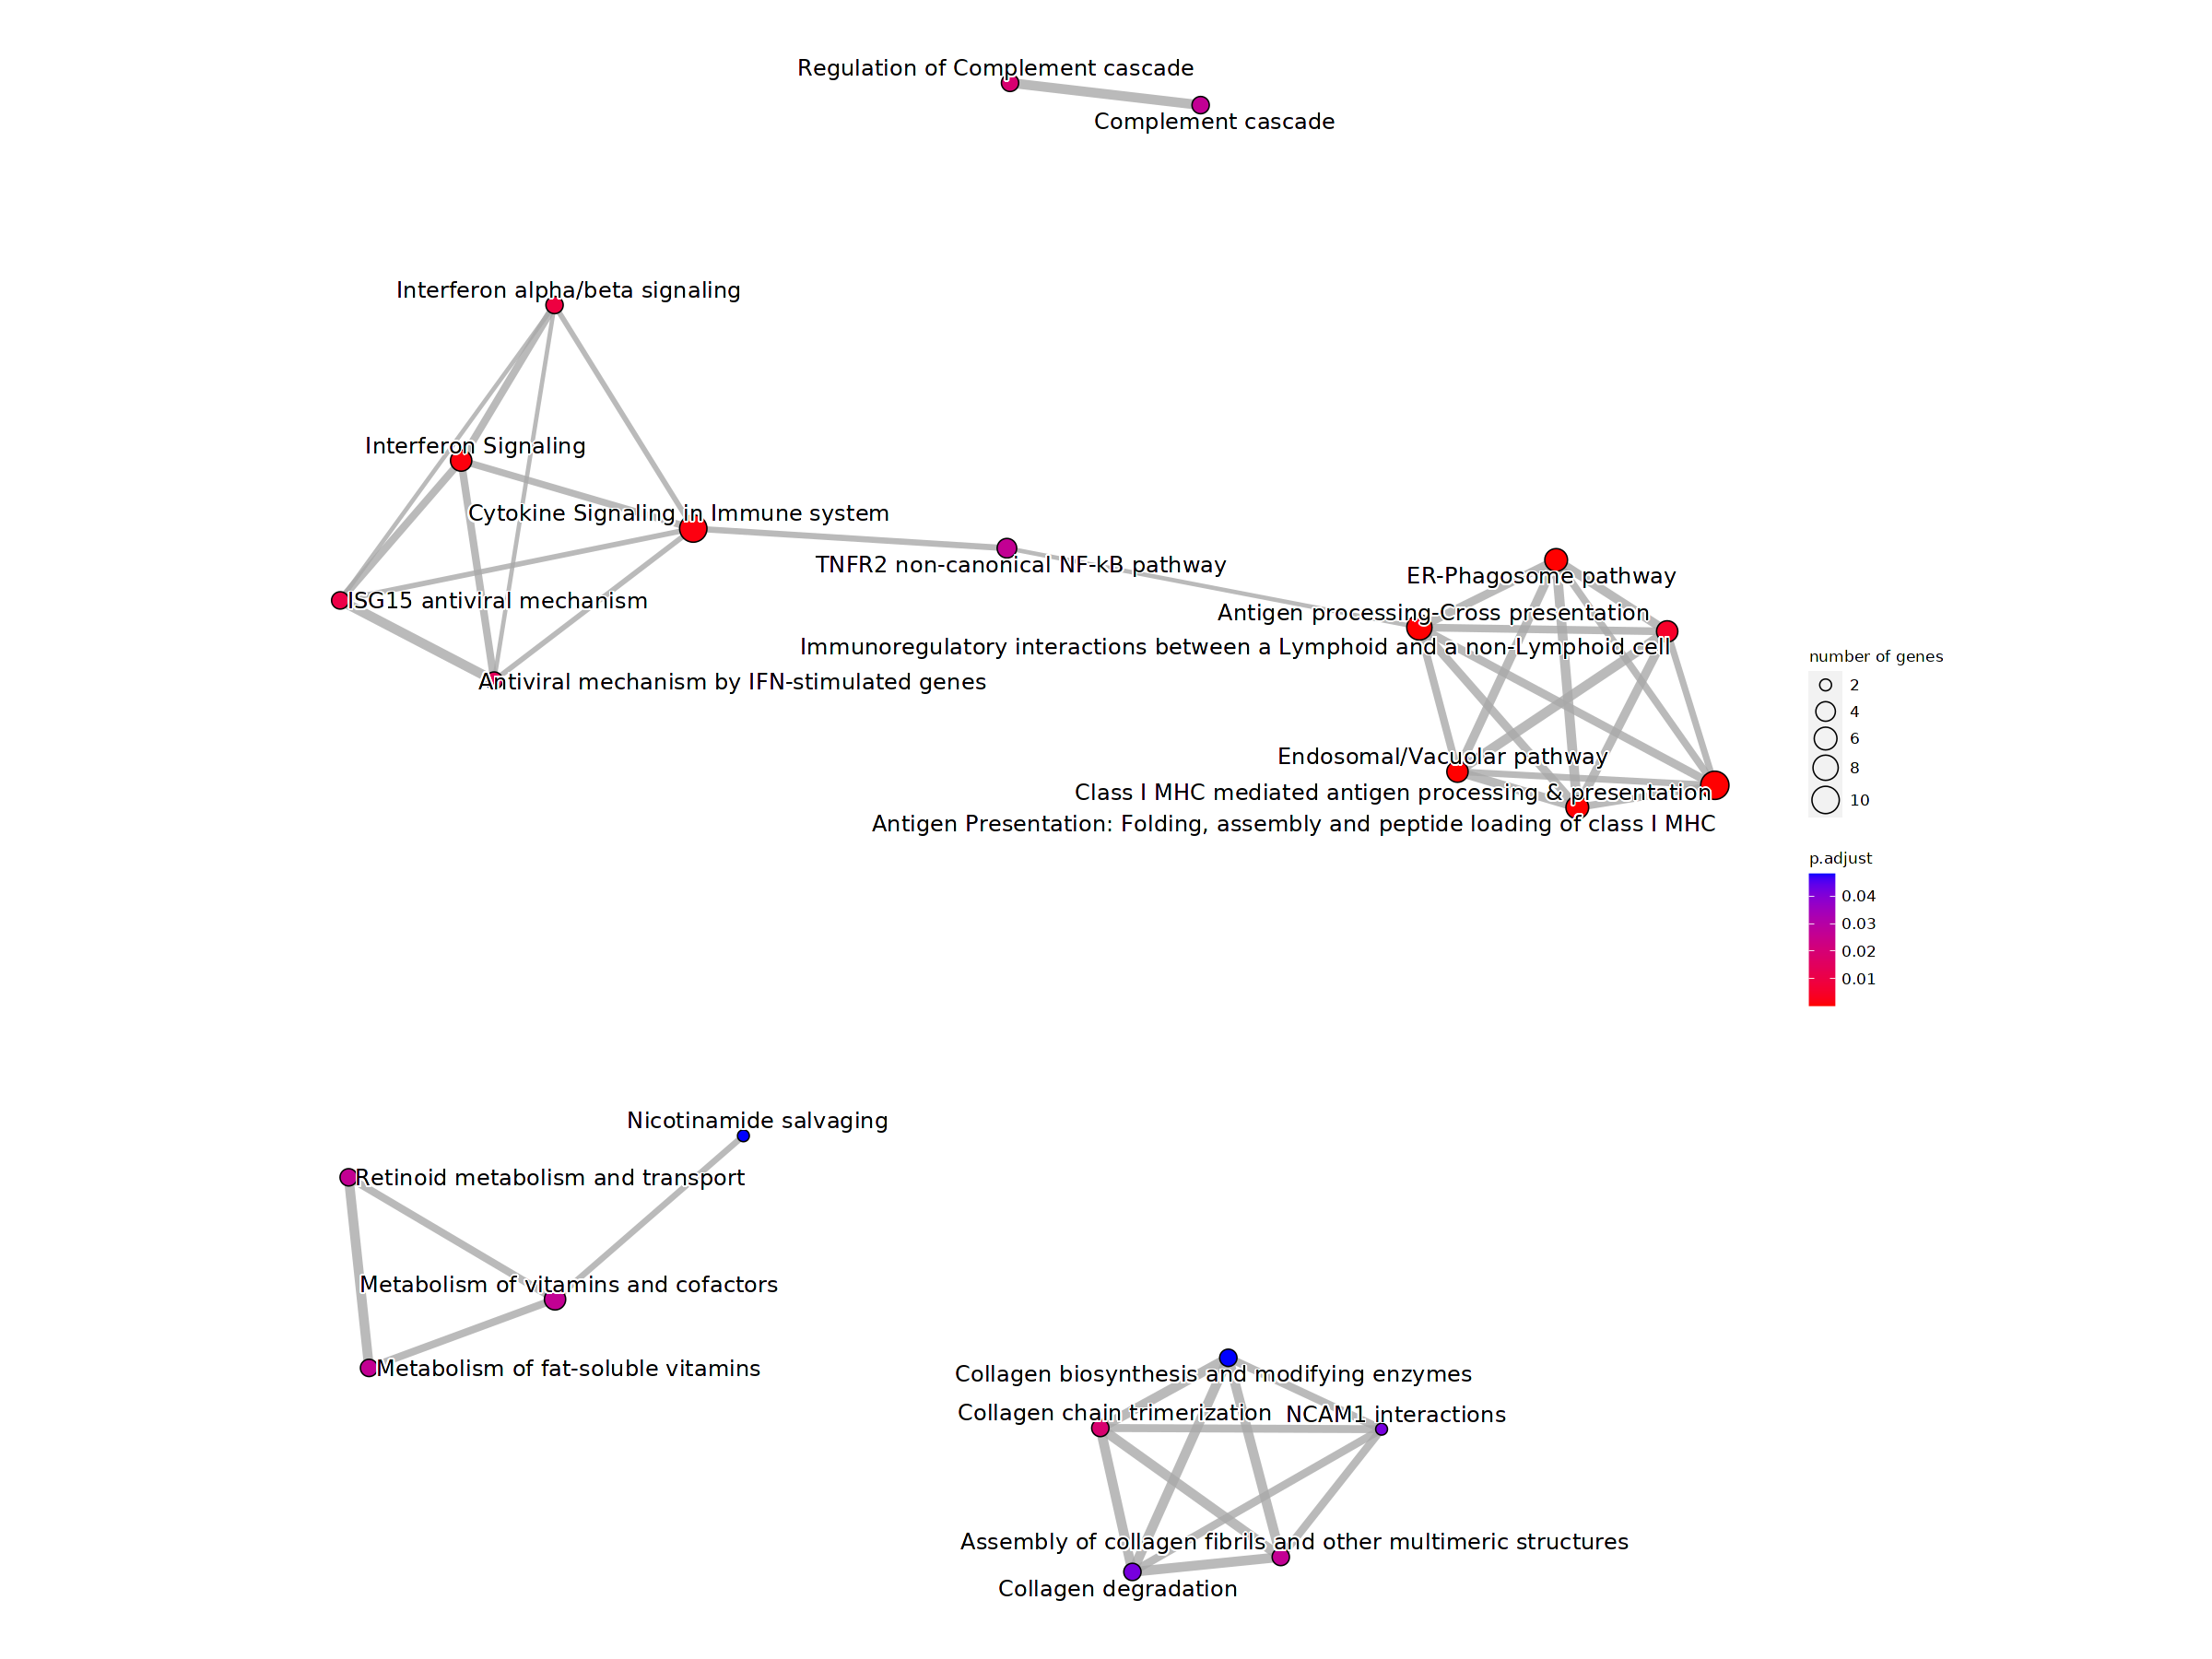

In [27]:
options(repr.plot.width=20, repr.plot.height=15)
emapplot(modulesReactome)

### 3.2 MOL2

In [29]:
cluster_choice = "MOL2"

In [30]:
gene_list <- MOL2_commun

In [31]:
tmp <- subset(MORNAATACCOL, subset = cellType_OL_merge == cluster_choice)

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_peaks_ol_ to umappeaksol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_bimod_ol_ to umapbimodol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_generegchrom_ol_ to pcageneregchromol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_generegchrom_ol_ to umapgeneregchromol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_dorcs_ol_ to pcadorcsol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_dorcs_ol_ to umapdorcsol_"


In [32]:
DefaultAssay(tmp) <- "RNA"

In [33]:
ensembl = useMart("ensembl",dataset="mmusculus_gene_ensembl")
attributes = listAttributes(ensembl)
Biomart_gencode_ensembl84_biotypes <- getBM(attributes=c("mgi_symbol","ensembl_gene_id","entrezgene_id","gene_biotype"), filters = "", values = "", ensembl)
Biomart_gencode_ensembl84_biotypes[, 'gene_biotype'] <- as.factor(Biomart_gencode_ensembl84_biotypes[,'gene_biotype'])

In [34]:
#Filter for only our genes
Biotype_All_dataset <- subset(Biomart_gencode_ensembl84_biotypes, mgi_symbol %in% rownames(tmp))
entrezID <- subset(Biotype_All_dataset, Biotype_All_dataset$mgi_symbol %in% rownames(tmp))

In [35]:
entrezmatched <- entrezID[match(gene_list,entrezID$mgi_symbol),]

In [36]:
entrezmatched_filtered <- entrezmatched[! apply(entrezmatched[,c(1,3)], 1,function (y) anyNA(y)),]

In [37]:
allLLIDs <- entrezmatched_filtered$entrezgene

In [38]:
modulesReactome <- enrichPathway(allLLIDs,organism="mouse", pvalueCutoff=0.05, qvalueCutoff = 0.05, pAdjustMethod = "fdr", readable=T)

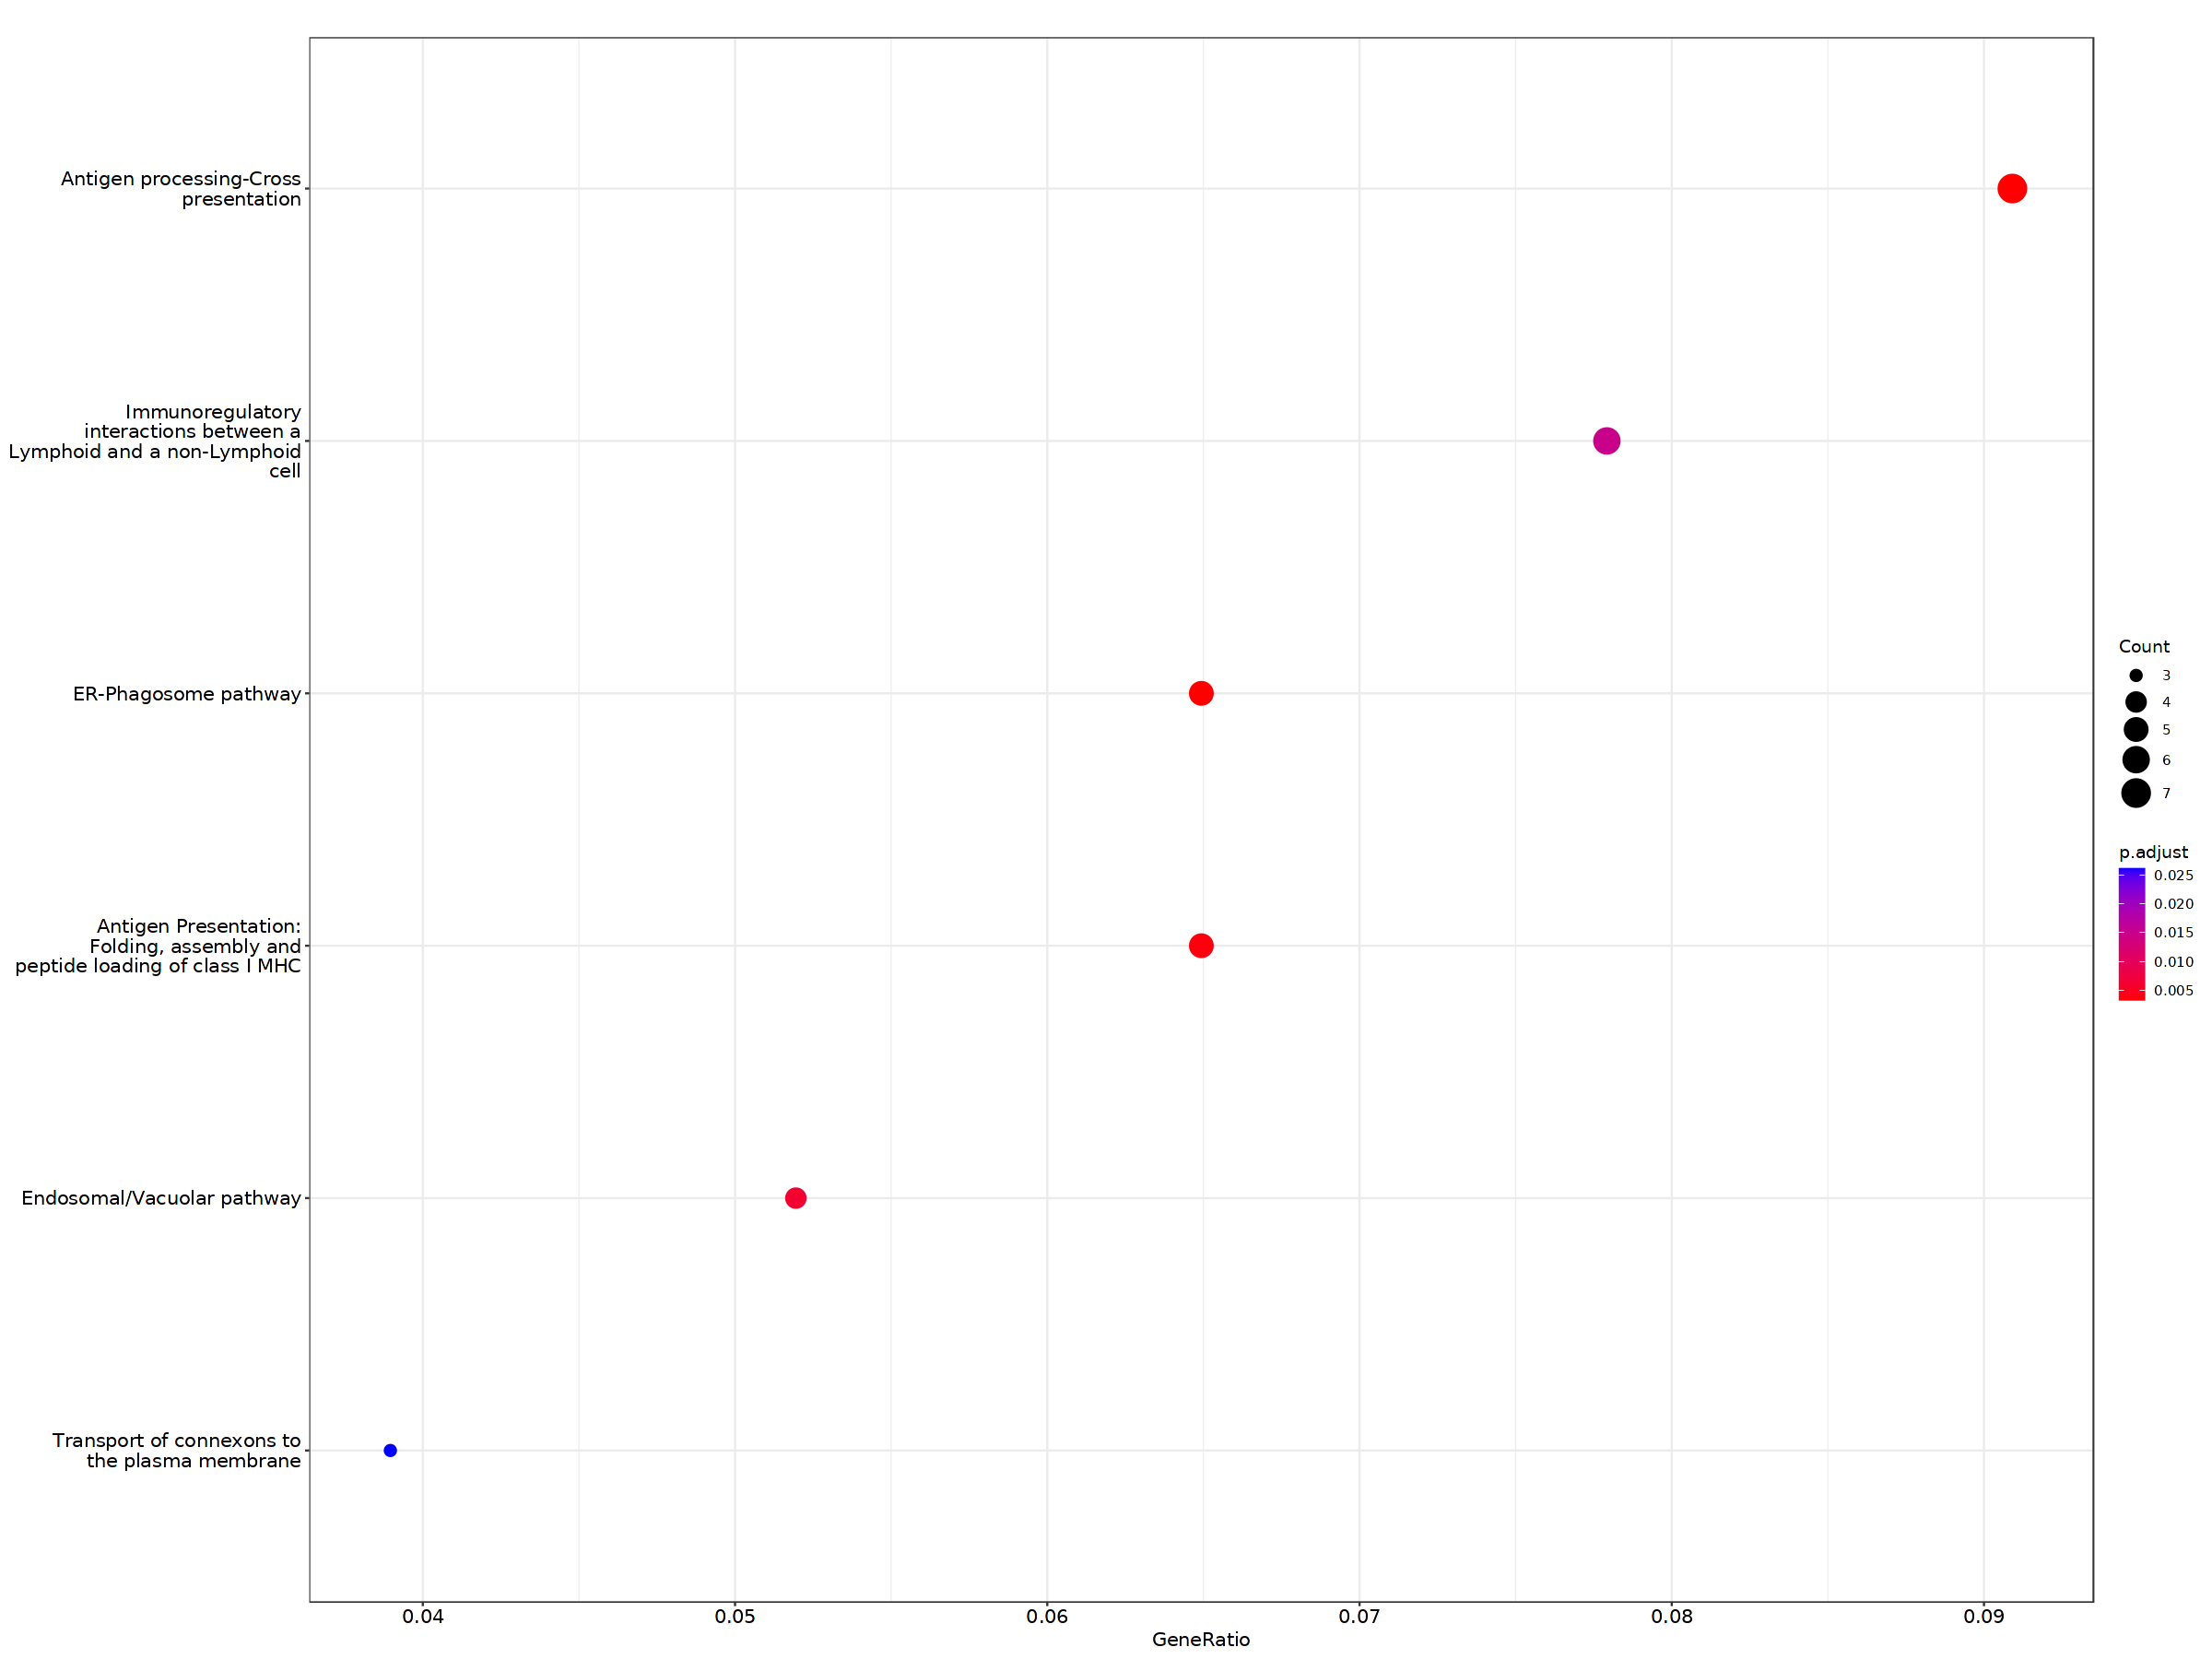

In [39]:
options(repr.plot.width=20, repr.plot.height=15)
dotplot(modulesReactome, showCategory=10, orderBy="GeneRatio")

In [40]:
modulesReactome <- pairwise_termsim(modulesReactome, method = "JC", semData = NULL, showCategory = 50)

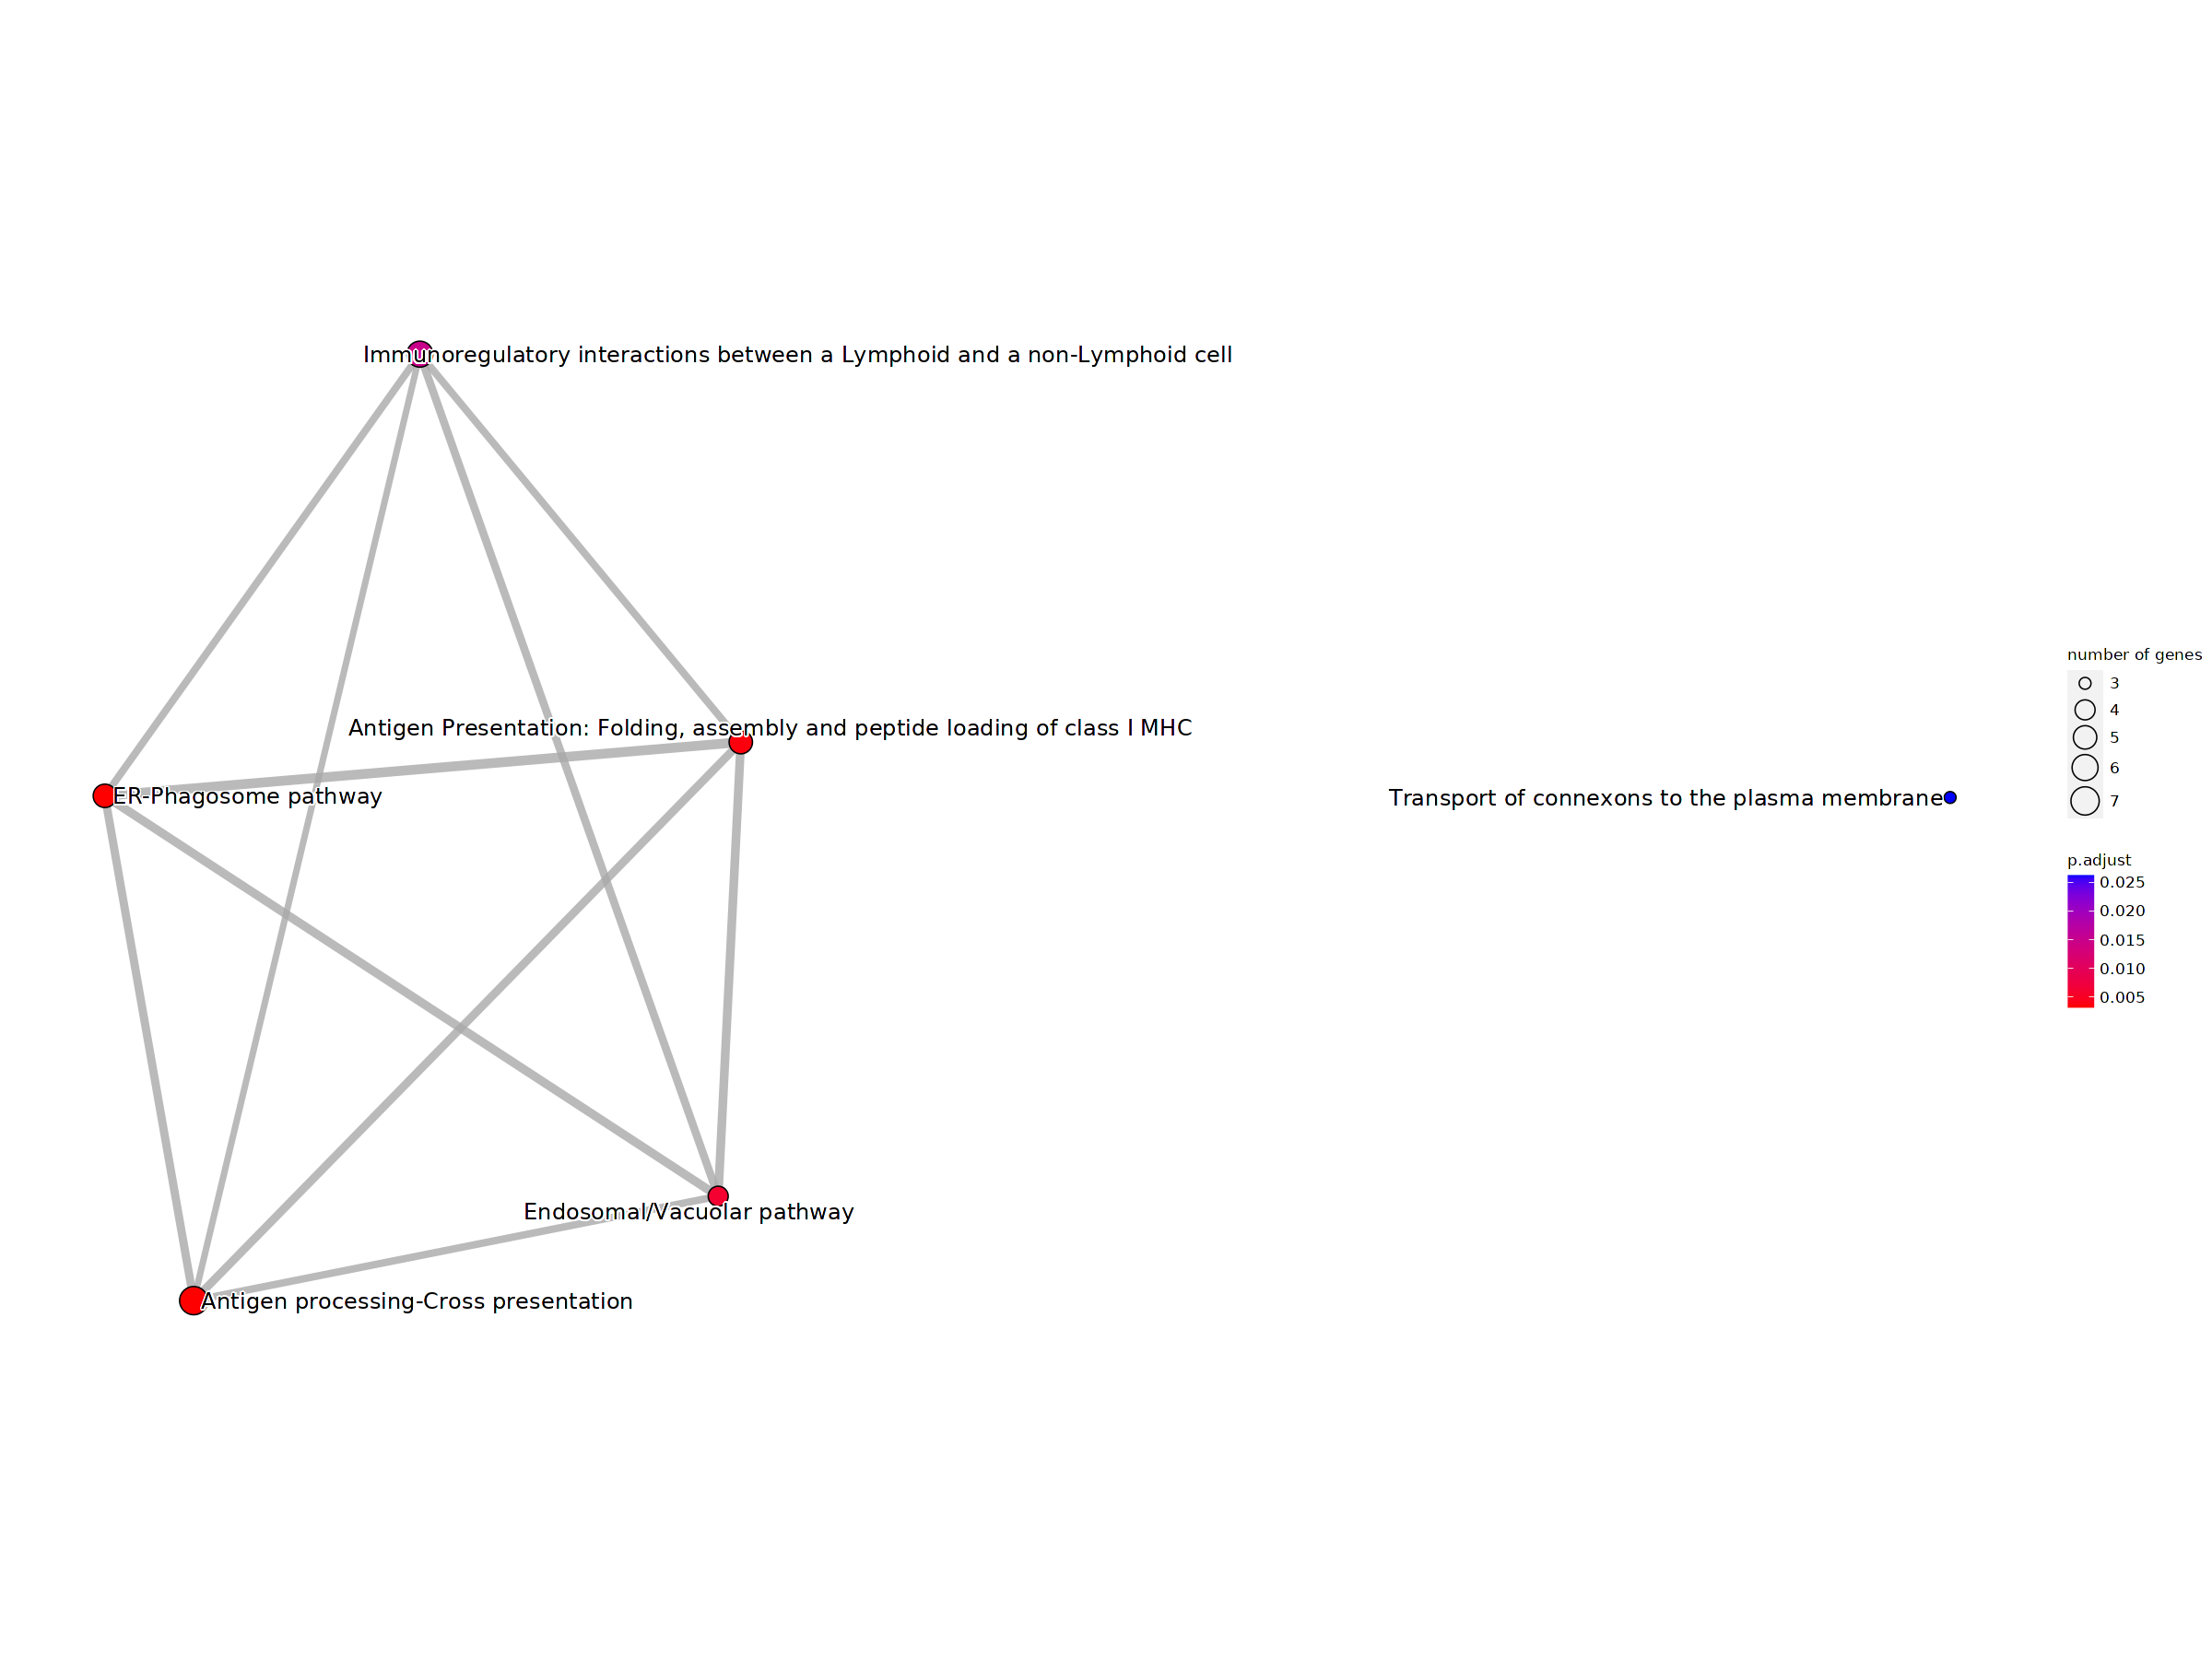

In [41]:
options(repr.plot.width=20, repr.plot.height=15)
emapplot(modulesReactome)